In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("HousePrices.csv",index_col = 'Id')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# 1. Data Exploration/Data Analysis

In [4]:
# Shape of the dataset
data.shape

(1460, 80)

In [5]:
# Datatypes of the variables of dataset
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

### Missing Values

In [6]:
# Missing values
var_na = []
for column in data.columns:
    if data[column].isnull().sum() != 0:
        var_na.append(column)
for var in var_na:
    print(var,np.round(data[var].isnull().mean(),3),'% Missing values')

LotFrontage 0.177 % Missing values
Alley 0.938 % Missing values
MasVnrType 0.005 % Missing values
MasVnrArea 0.005 % Missing values
BsmtQual 0.025 % Missing values
BsmtCond 0.025 % Missing values
BsmtExposure 0.026 % Missing values
BsmtFinType1 0.025 % Missing values
BsmtFinType2 0.026 % Missing values
Electrical 0.001 % Missing values
FireplaceQu 0.473 % Missing values
GarageType 0.055 % Missing values
GarageYrBlt 0.055 % Missing values
GarageFinish 0.055 % Missing values
GarageQual 0.055 % Missing values
GarageCond 0.055 % Missing values
PoolQC 0.995 % Missing values
Fence 0.808 % Missing values
MiscFeature 0.963 % Missing values


<AxesSubplot:ylabel='Id'>

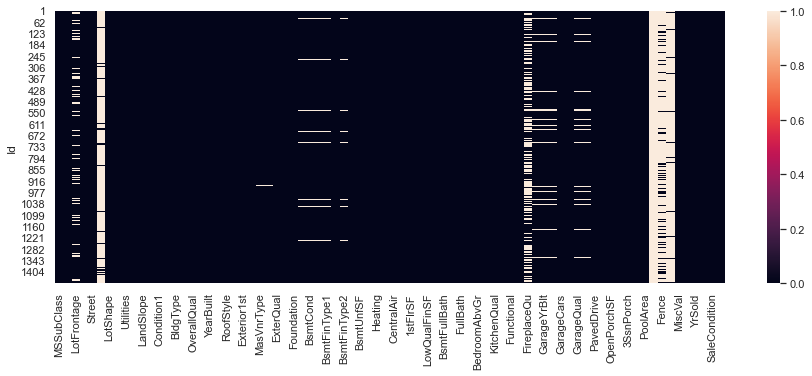

In [7]:
# Heatmap of missing values
sns.set(rc = {'figure.figsize':(15,5)})
sns.heatmap(data.isnull())

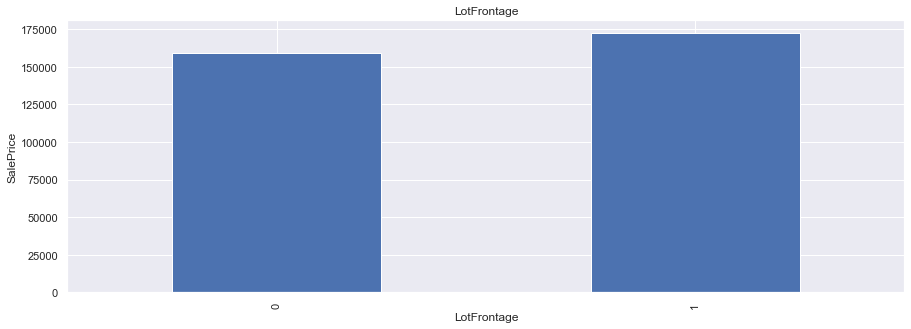

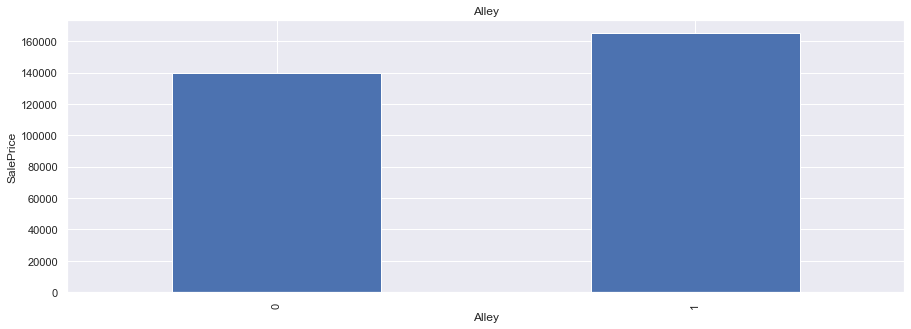

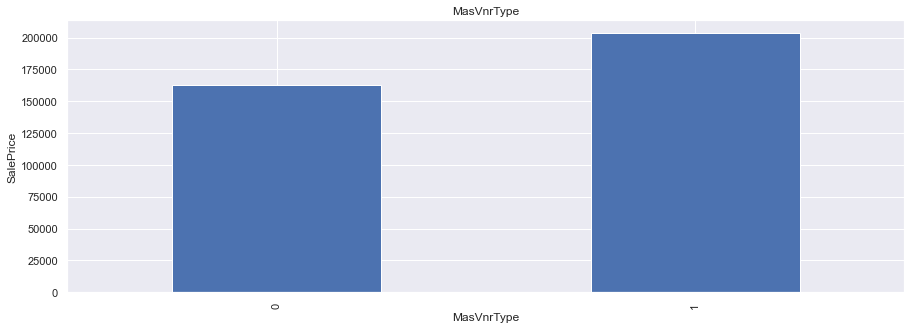

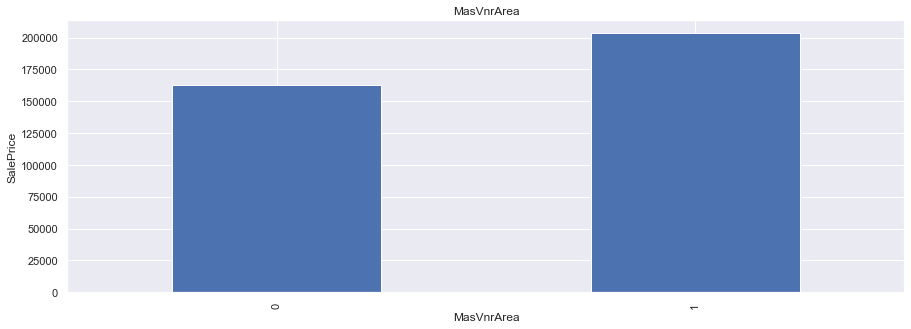

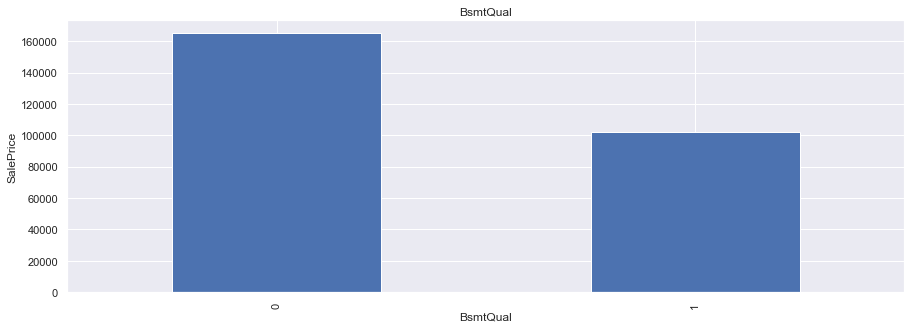

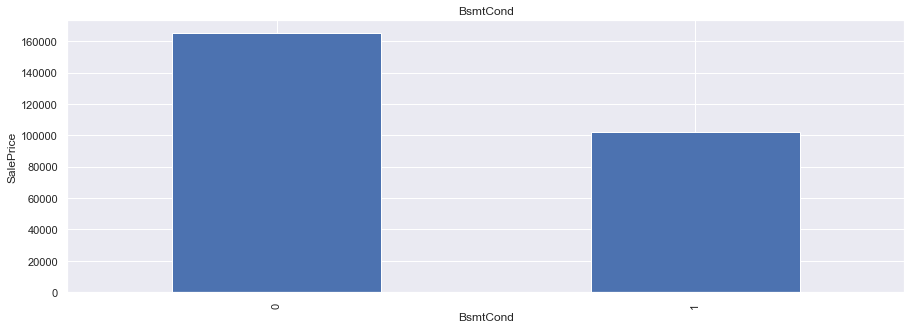

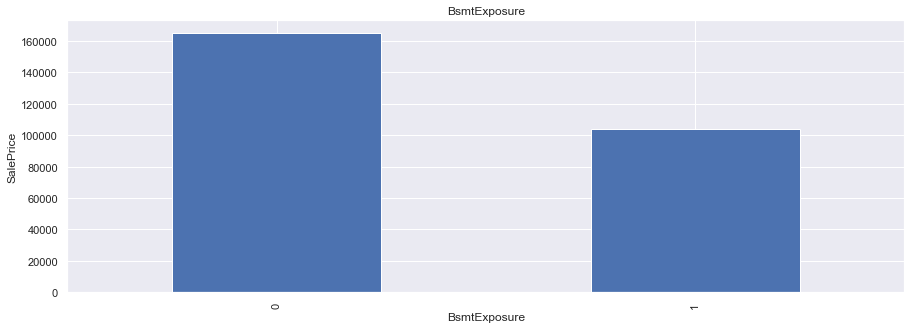

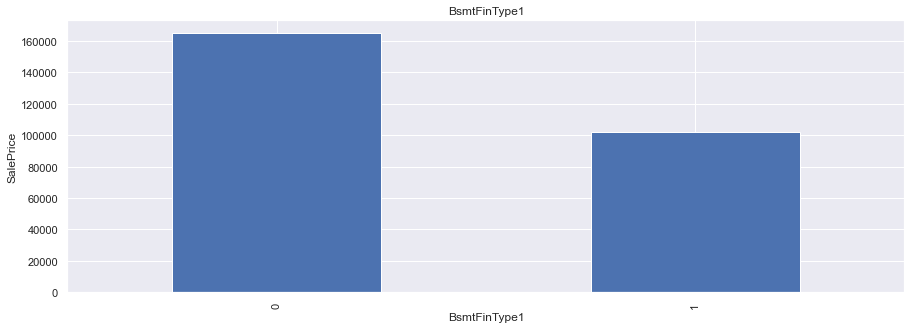

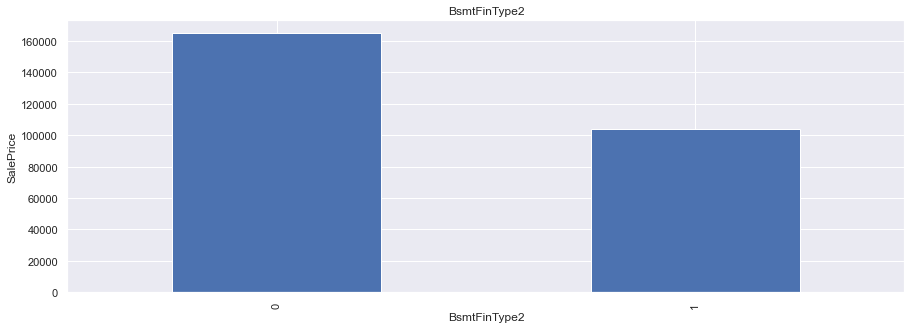

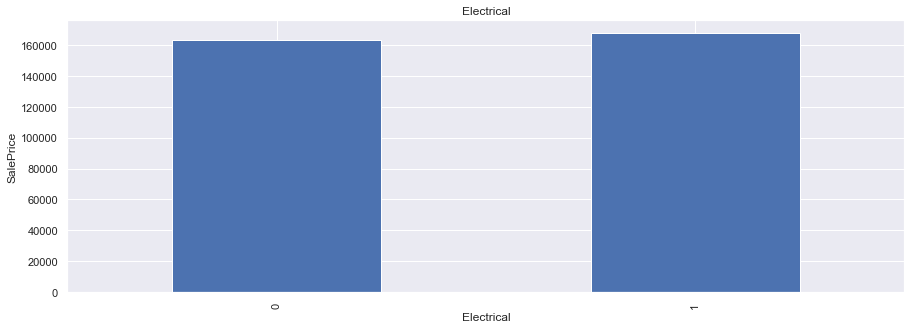

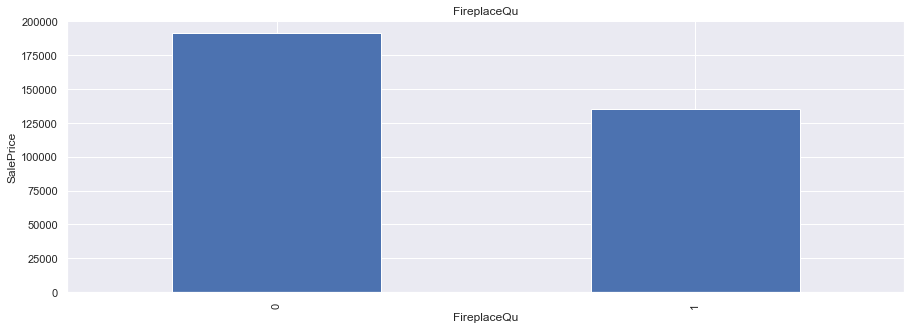

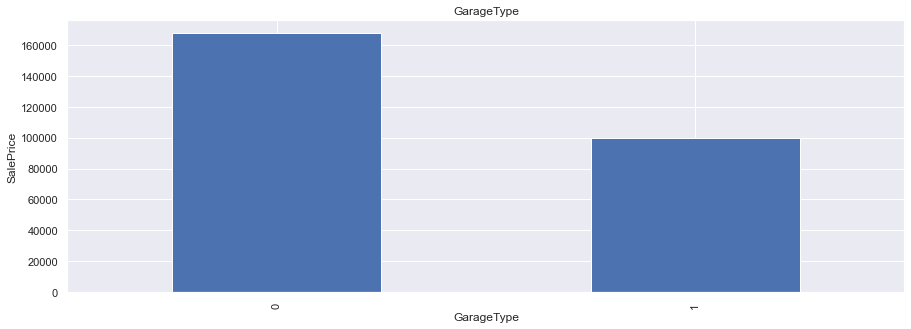

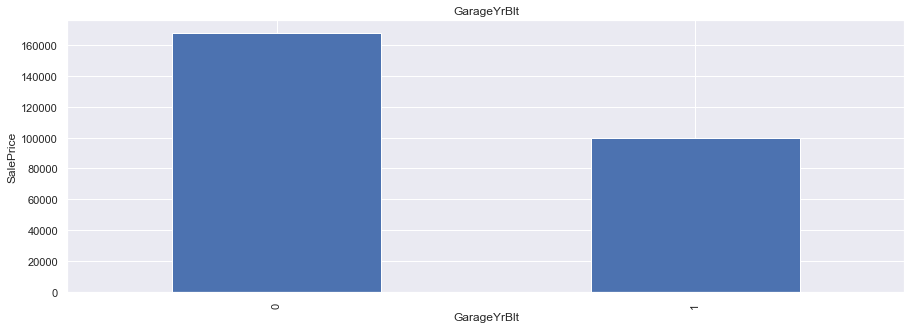

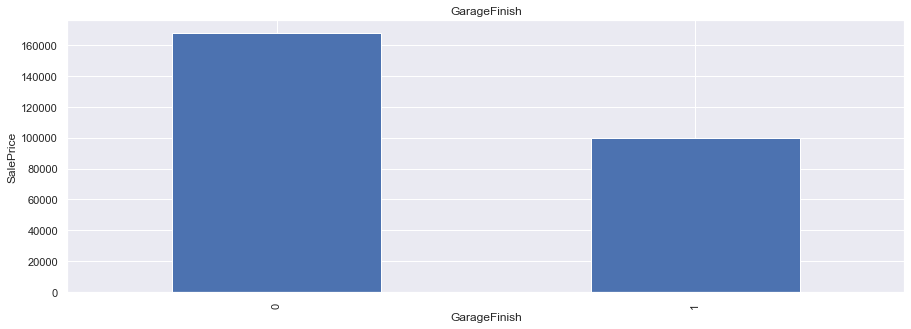

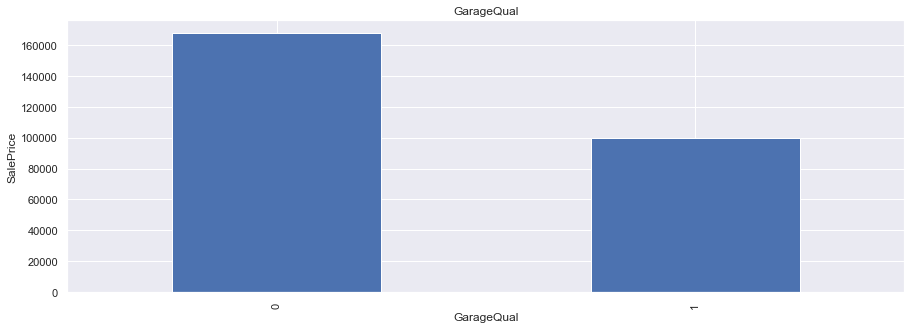

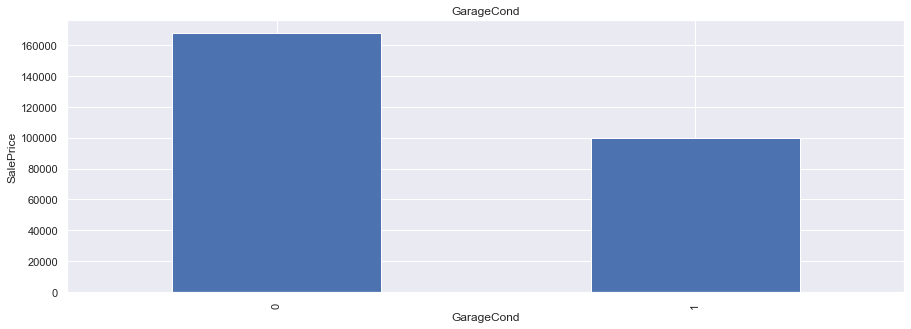

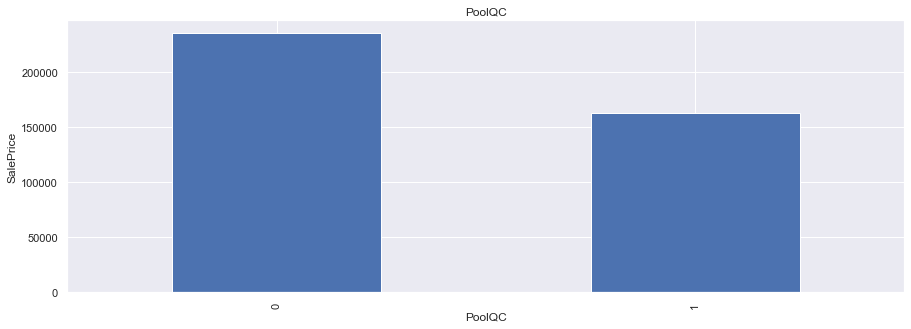

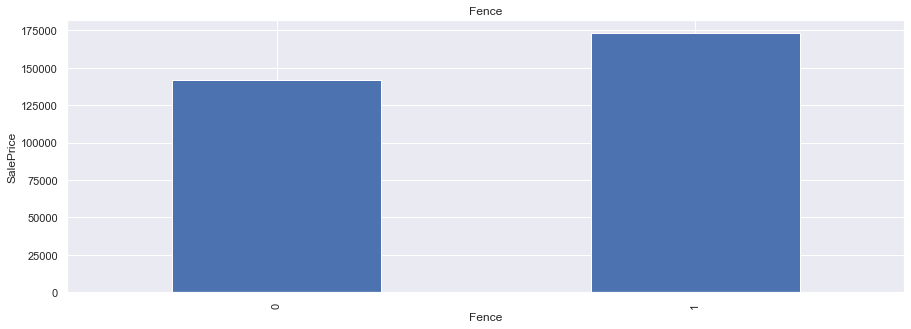

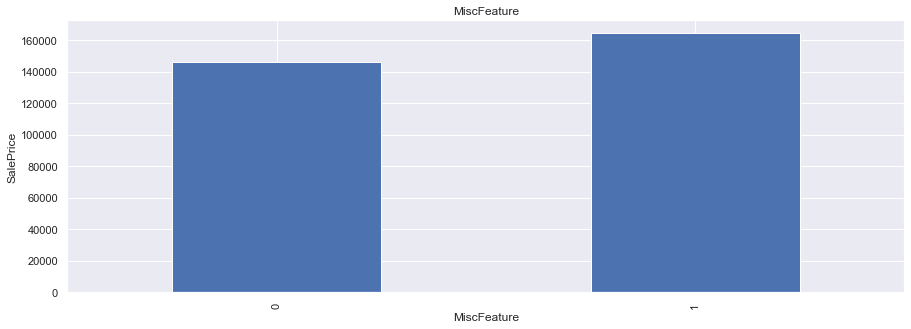

In [8]:
# Relationship between missing values and SalesPrice(DV)
for var in var_na:
    df = data.copy()
    
    # 1 specify for missing values and 0 for non-null values
    df[var] = np.where(df[var].isnull(),1,0)
    
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()

### Conclusions:
1. 19 features have missing values
2. Alley, PoolQC, Fence, MiscFeature have more than 85% missing values. 
3. Clearly Relationship between missing values and SalePrice are visible.
4. <b>Task:</b>So For handling this missing values we will do it in feature engineering.

## Categorical & Numerical

In [9]:
# Categorical vs numerical variables (How many?)
categorical_var = []
numerical_var = []
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_var.append(column)
    else:
        numerical_var.append(column)
print( 'Total Numerical variables are',len(numerical_var))
print( 'Total Categorical variables are',len(categorical_var))

Total Numerical variables are 37
Total Categorical variables are 43


## 1. Numerical

In [10]:
# Overview of numerical data
data[numerical_var].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [45]:
df[numerical_var].columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### 1.1 Temporal Data Analysis

In [11]:
# Temporal data - Related to Date,Time,Year
# Let's Find how many temporal var are present in our dataset

# List of temporal data 
year_var = [feature for feature in numerical_var if 'Yr' in feature or 'Year' in feature ]
year_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

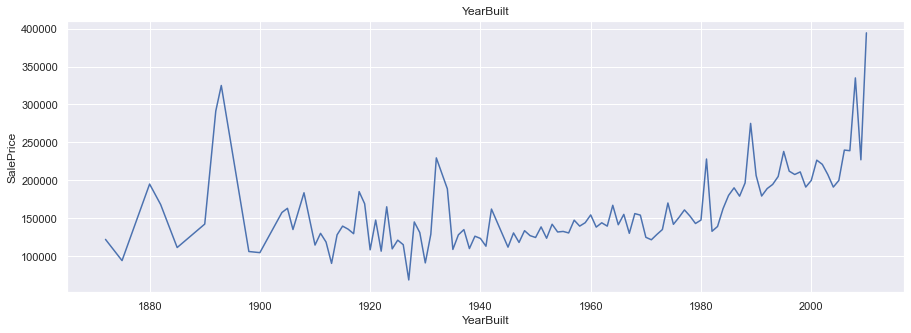

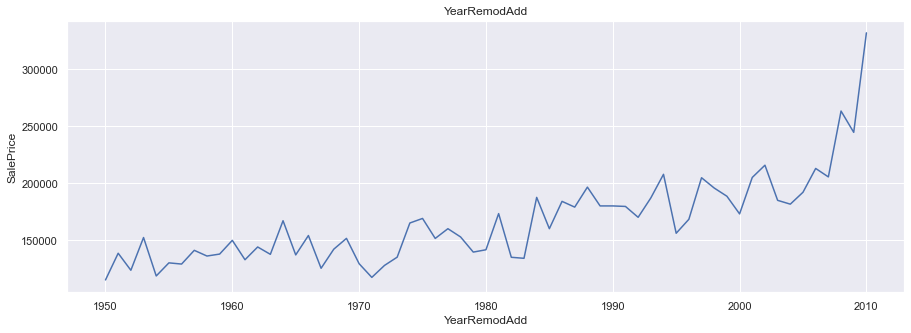

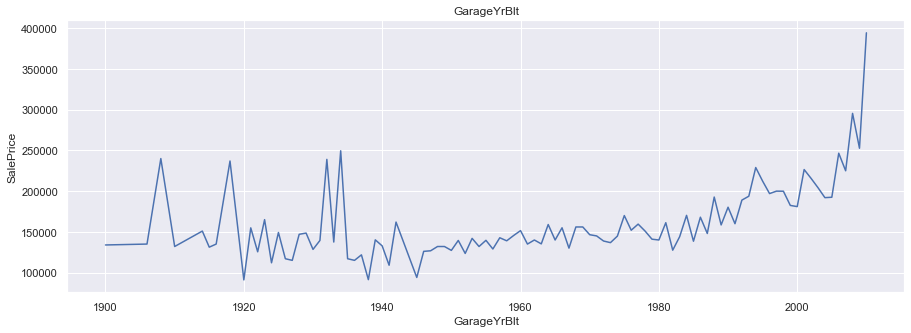

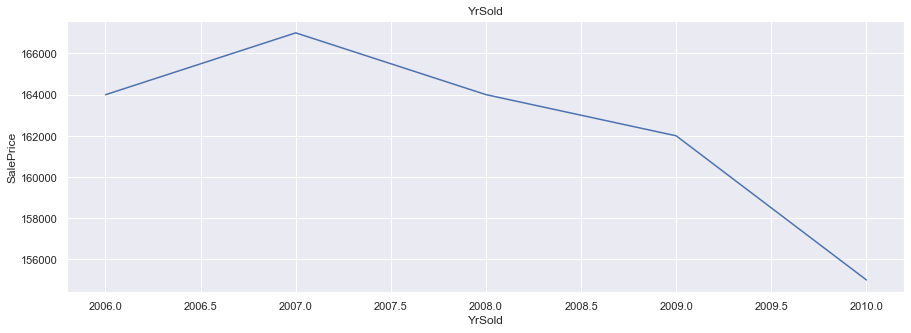

In [12]:
# Relationship between temporal data and SalePrice
for var in year_var:
    df = data.copy()
    
    df.groupby(var)['SalePrice'].median().plot()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()

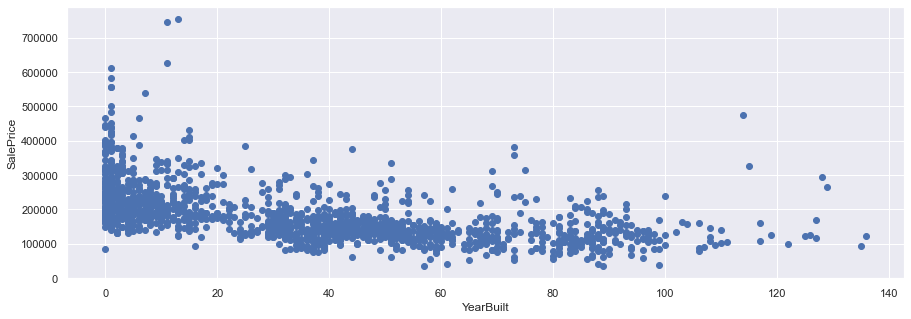

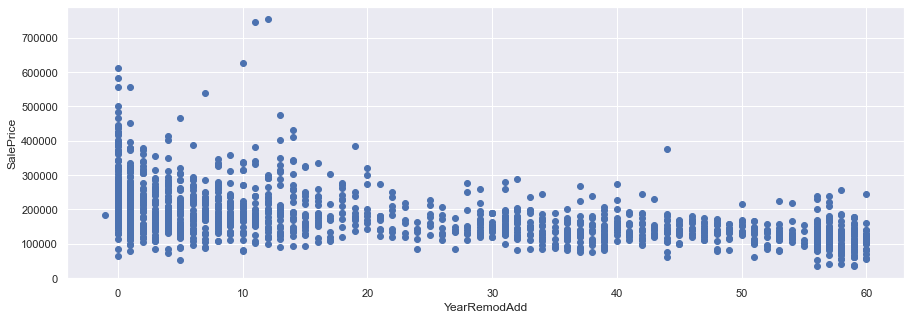

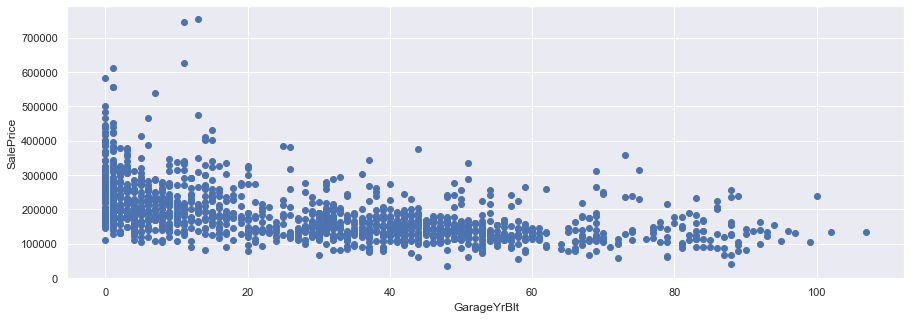

In [13]:
# Relationship between Age of house and SalePrice
# Plotting the difference of year variable with YrSold and SalePrice
for var in year_var:
    df = data.copy()
    
    if var != 'YrSold':
        df[var] = df['YrSold'] - df[var]
        plt.scatter(x = var,y = 'SalePrice',data = df)
        plt.xlabel(var)
        plt.ylabel('SalePrice')
        plt.show()
   

#### Conclusions:
1. From YrSold vs SalePrice graph - Decreasing as YrSold increases (why?)
2. But Age affect the price of houses. (Age = YrSold-YrBuild) - if Age increases Price Decreases.

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

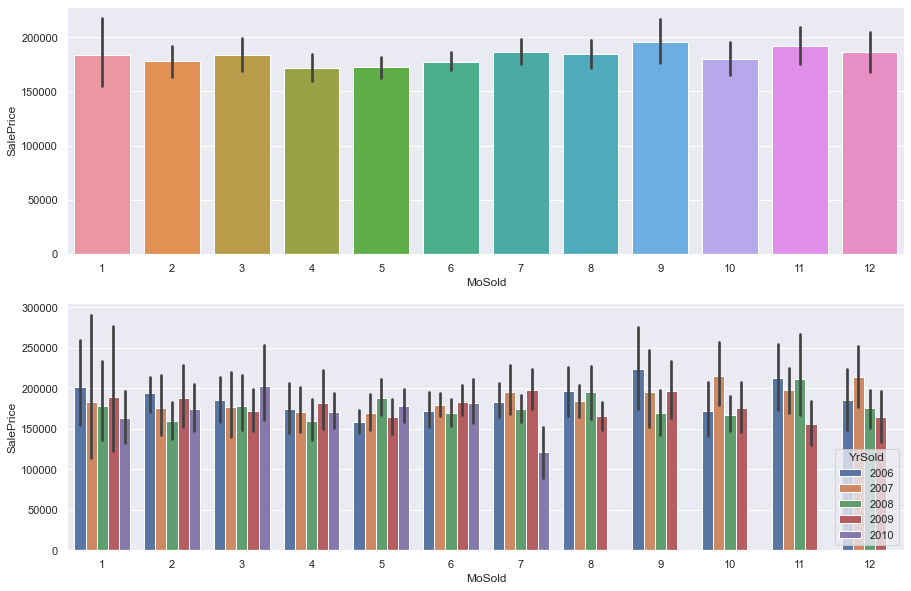

In [23]:
# Relationship between Month Sold and SalePrice
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(2,1,1)
sns.barplot(x = 'MoSold',y = 'SalePrice',data = data)

plt.subplot(2,1,2)
sns.barplot(x = 'MoSold',y = 'SalePrice',data = data,hue='YrSold')

#### Conclusions:
1. House Price is not that much dependent on month of the year.

### 1.2 Discrete Variables

In [85]:
# Features which have atmost 25 discrete values
discrete_var = [var for var in numerical_var if len(df[var].unique()) < 25 and var not in year_var]

print('Total Discrete variables :',len(discrete_var))

for var in discrete_var:
    print(var,'has',len(df[var].unique()),'discrete values.')

Total Discrete variables : 17
MSSubClass has 15 discrete values.
OverallQual has 10 discrete values.
OverallCond has 9 discrete values.
LowQualFinSF has 24 discrete values.
BsmtFullBath has 4 discrete values.
BsmtHalfBath has 3 discrete values.
FullBath has 4 discrete values.
HalfBath has 3 discrete values.
BedroomAbvGr has 8 discrete values.
KitchenAbvGr has 4 discrete values.
TotRmsAbvGrd has 12 discrete values.
Fireplaces has 4 discrete values.
GarageCars has 5 discrete values.
3SsnPorch has 20 discrete values.
PoolArea has 8 discrete values.
MiscVal has 21 discrete values.
MoSold has 12 discrete values.


In [110]:
df[discrete_var].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
Id,,,,,,,,,,,,,,,,,
1,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
2,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
3,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
4,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
5,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


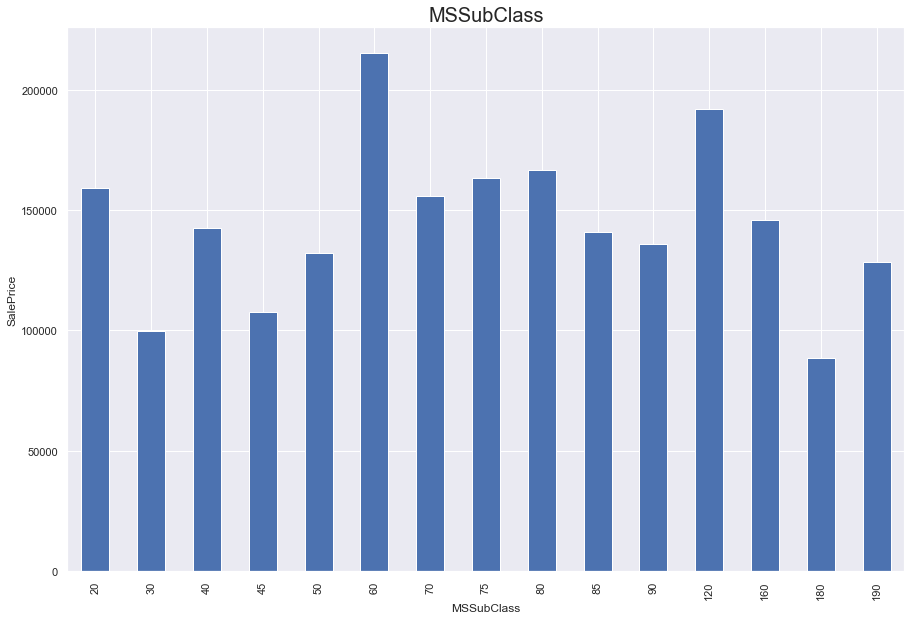

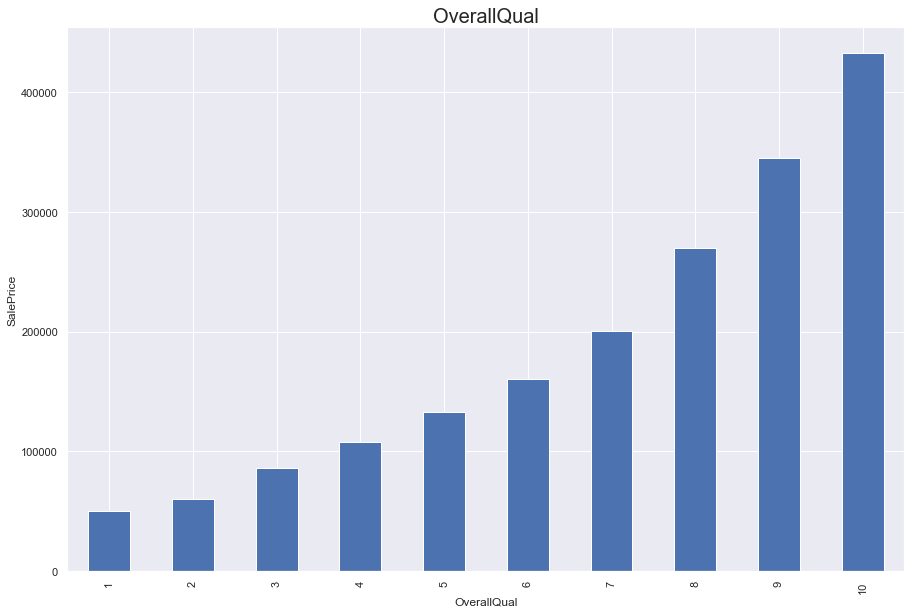

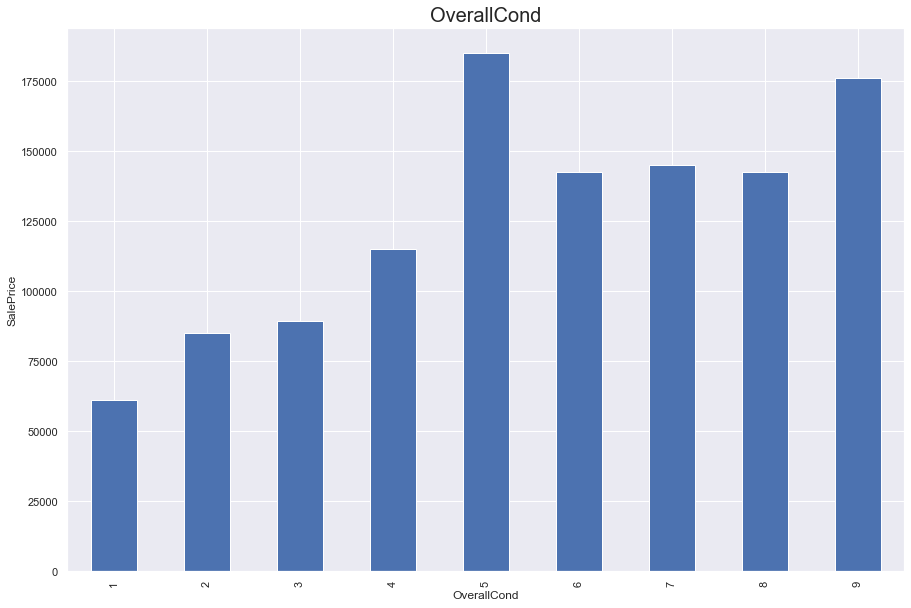

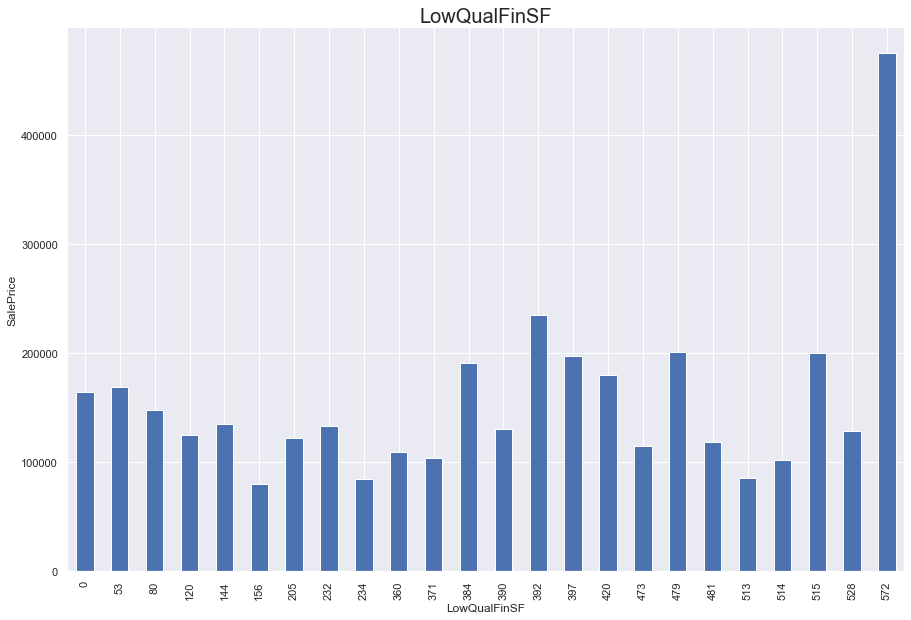

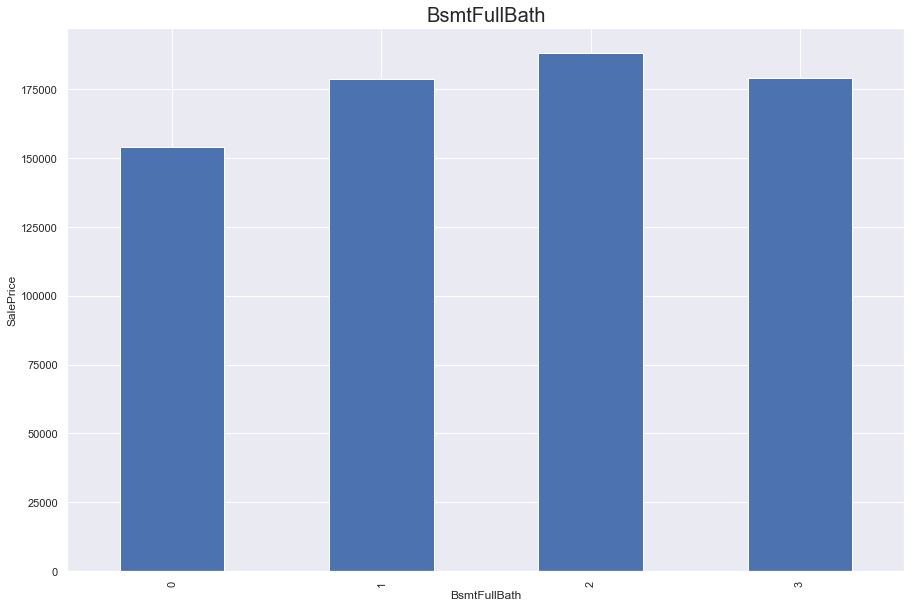

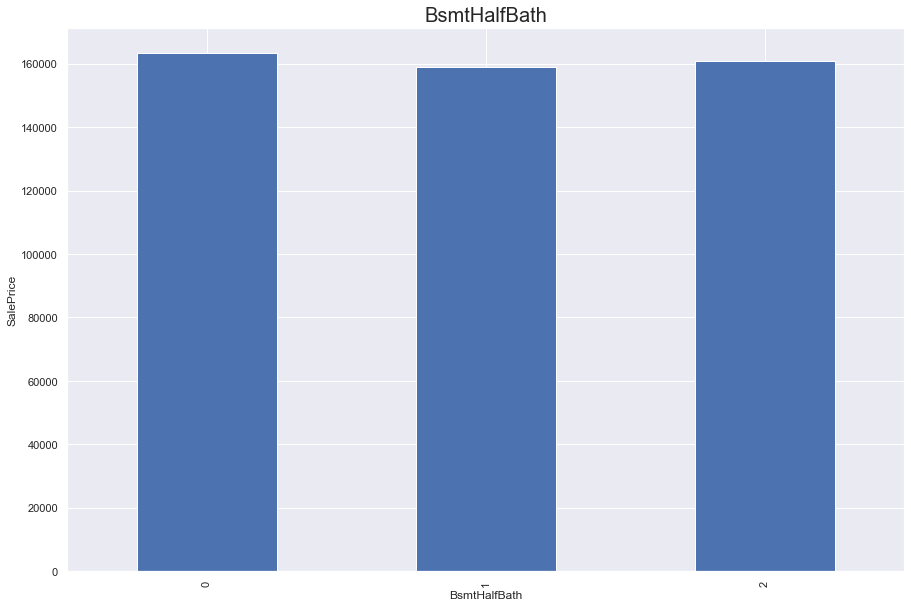

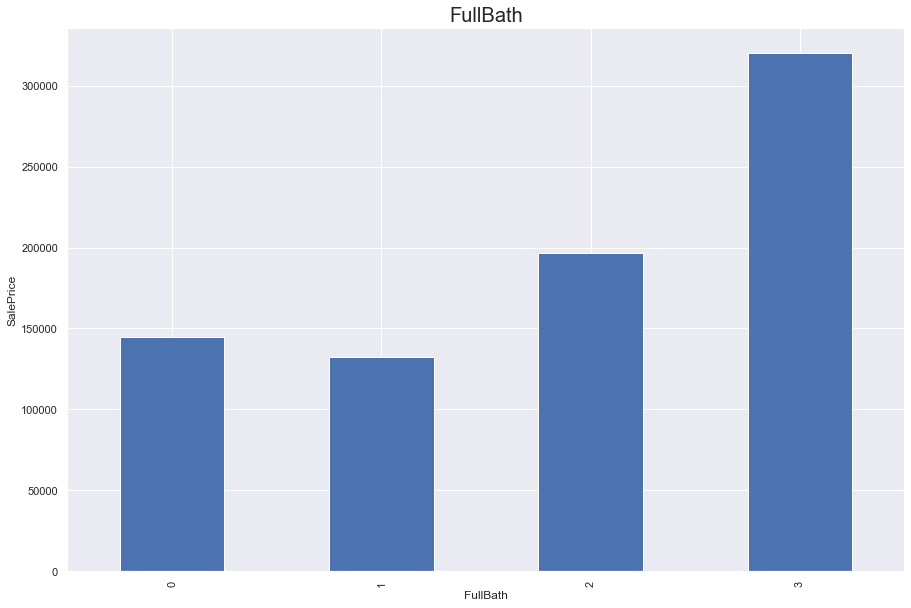

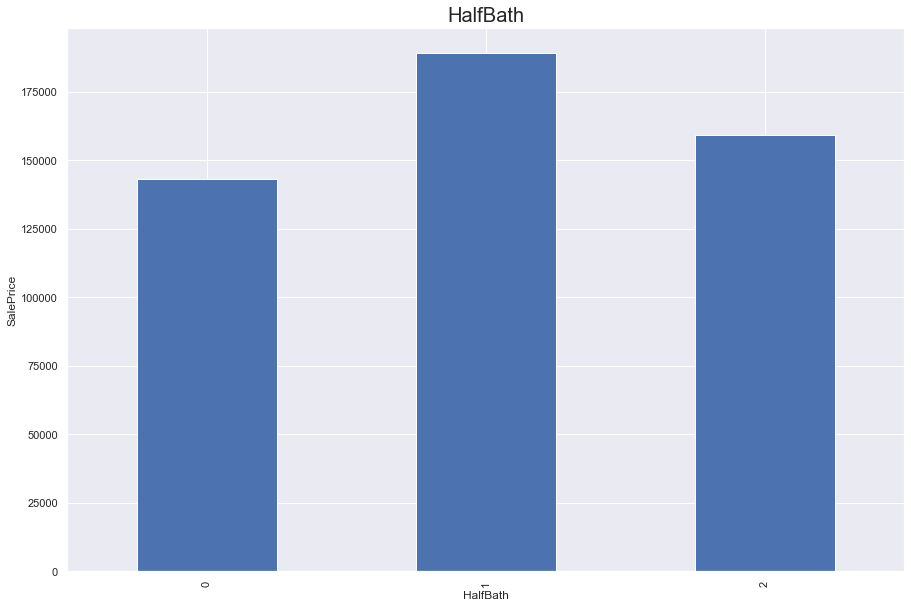

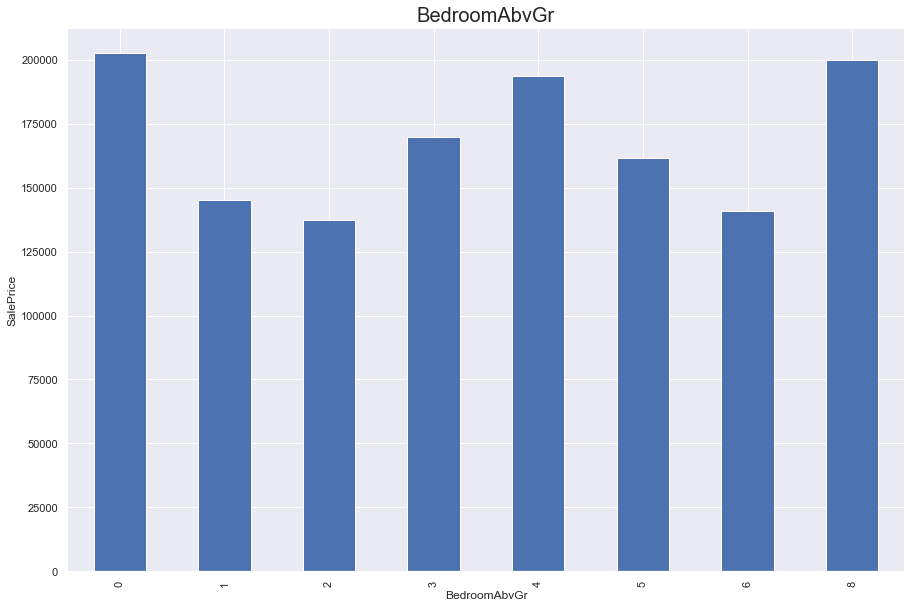

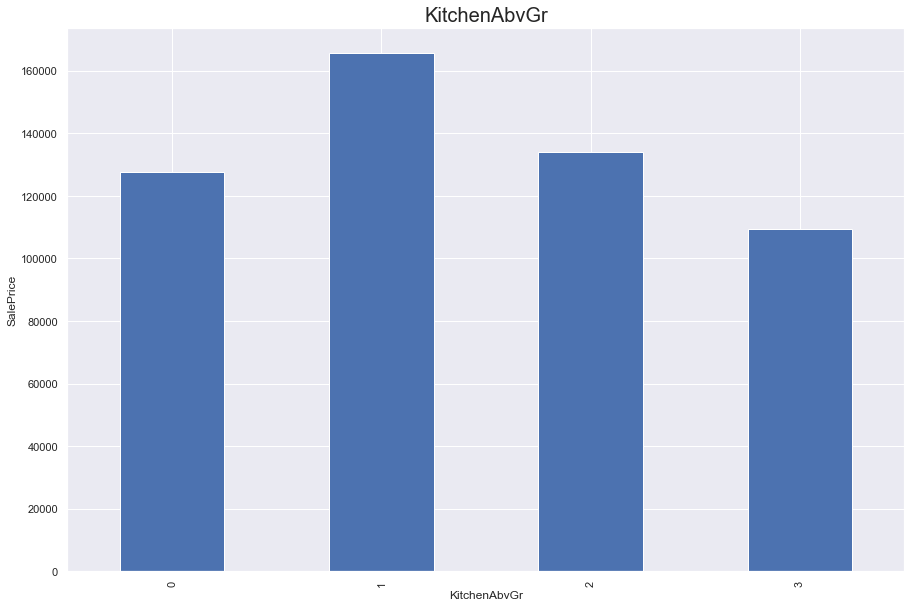

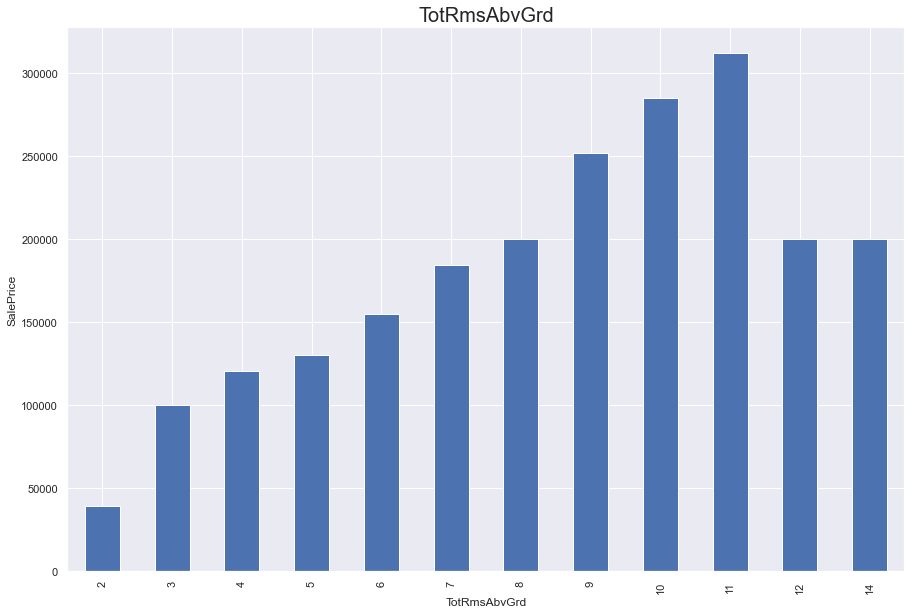

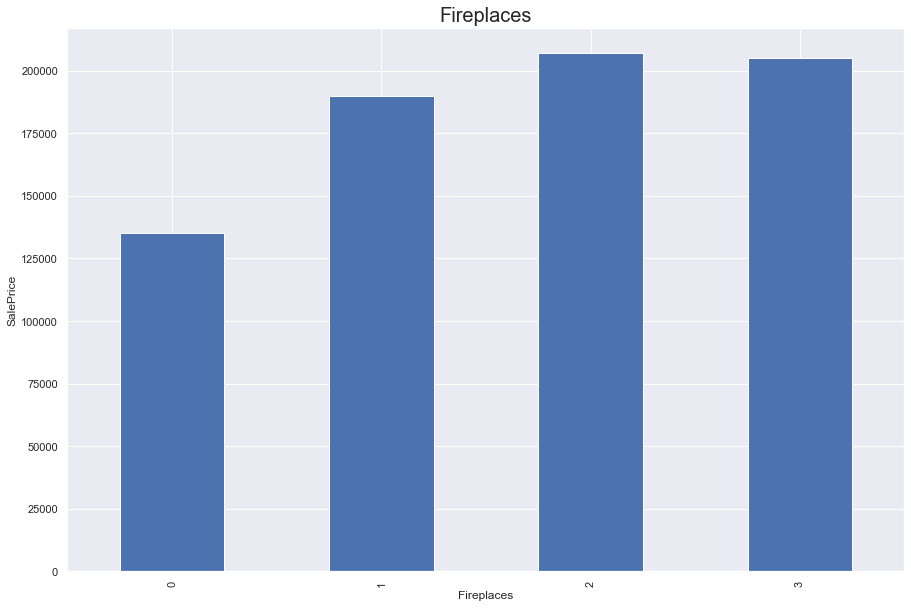

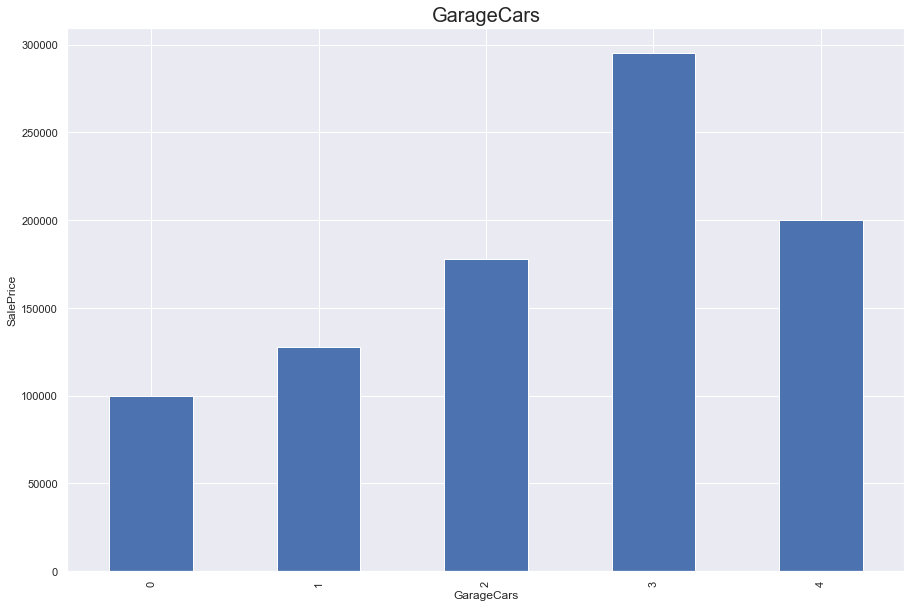

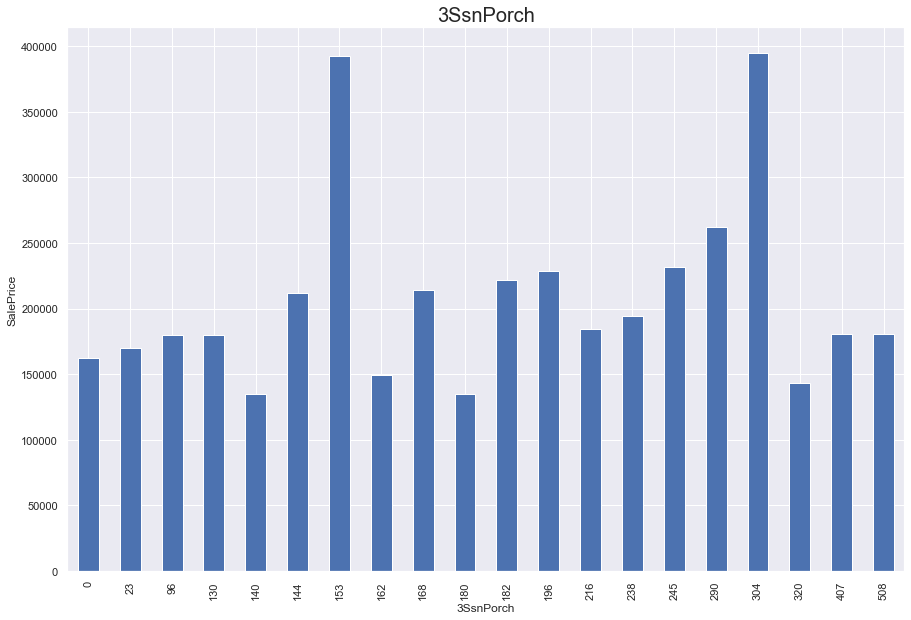

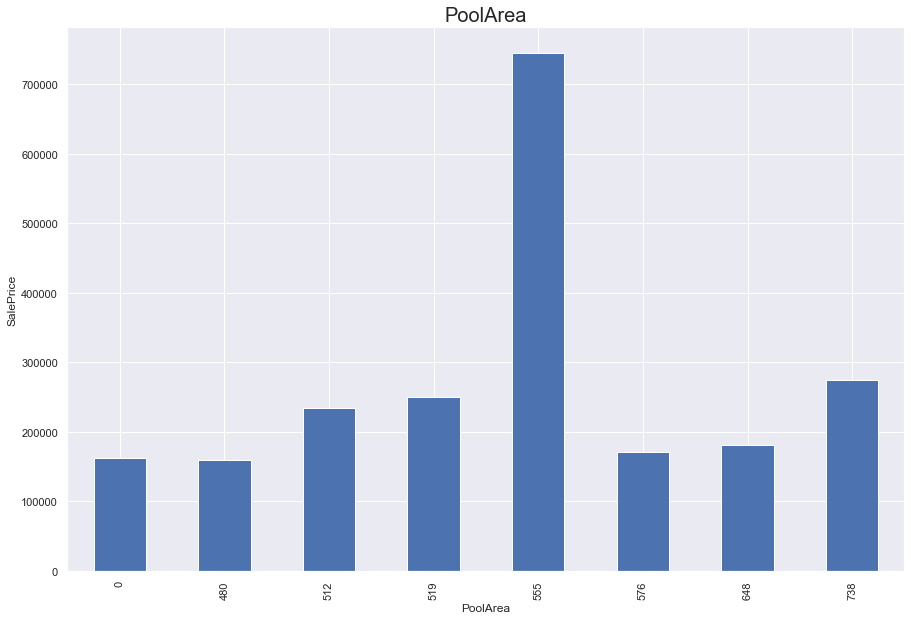

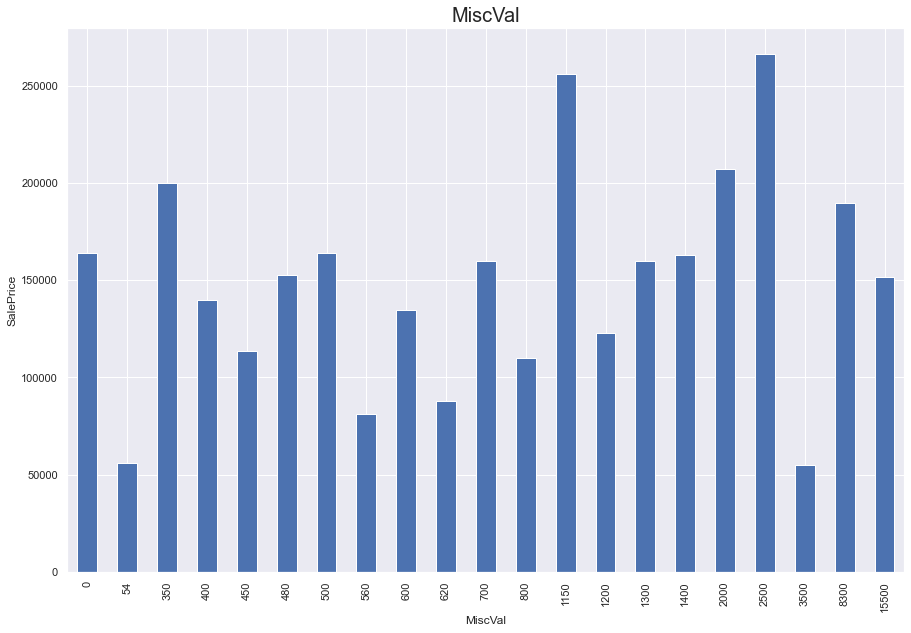

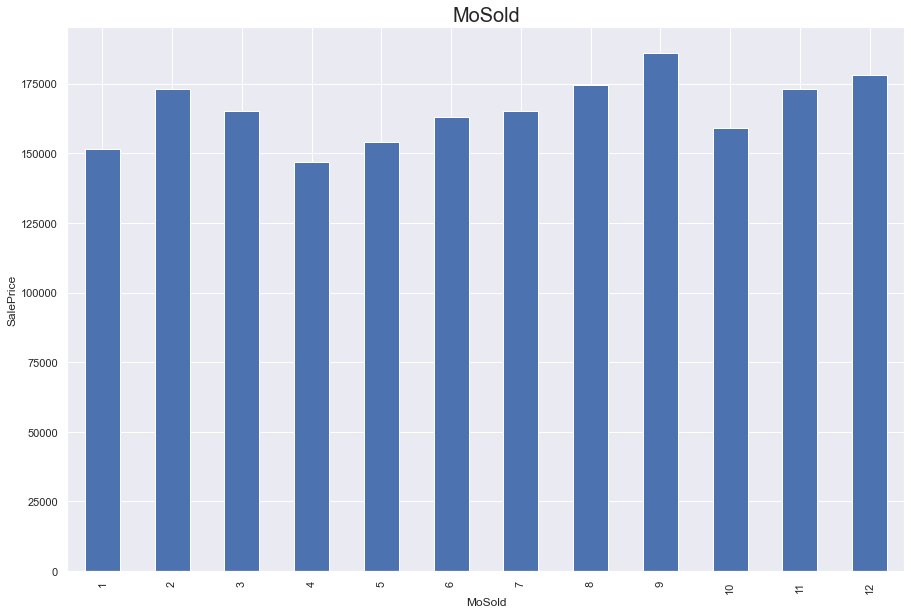

In [109]:
# Relationship between discrete variables and SalePrice
for var in discrete_var:
    df = data.copy()
    
    var, df.groupby(var)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.title(var, fontsize=20)
    plt.show()

#### Conclusions:
1. In MSSubClass of 60,170 has more SalePrice.
2. Exponential growth of SalePrice in OverallQual,OverallCond,FullBath,TotRmsAbvGrd,GarageCars.
3. LowQualFinSF of 392,572 has great effect on SalePrice.
4. People prefer 1 halfbathroom.
5. BsmtFullBathroom,BsmtHalfBath has quite no effect on SalePrice.
6. SalePrice also depends on FirePlaces.- exponential growth.
7. SalePrice is highest in case of PoolArea of 555.

### 1.3 Continuous Variables

In [114]:
# List of Contiuous variable
continuous_var = [var for var in numerical_var if var not in discrete_var+year_var]

print('Total Continuous variables :',len(continuous_var))

Total Continuous variables : 16


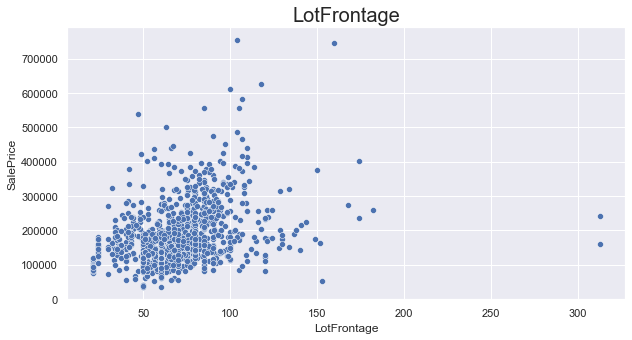

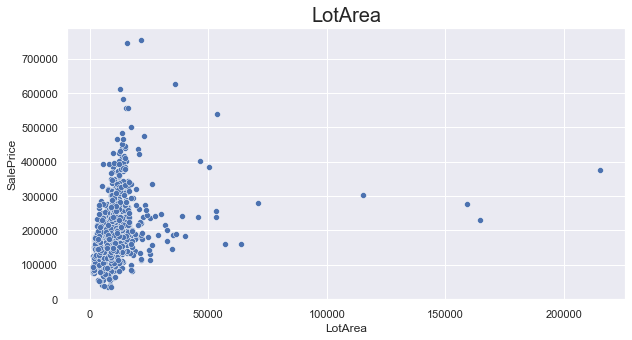

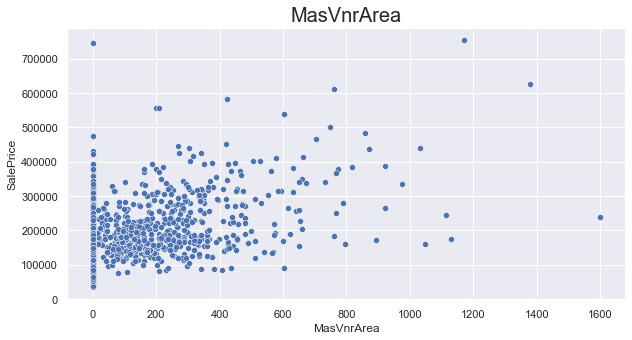

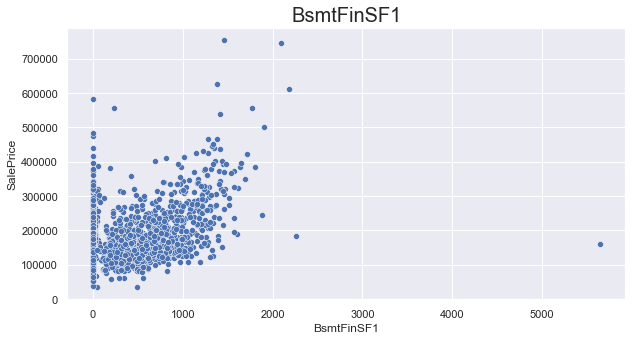

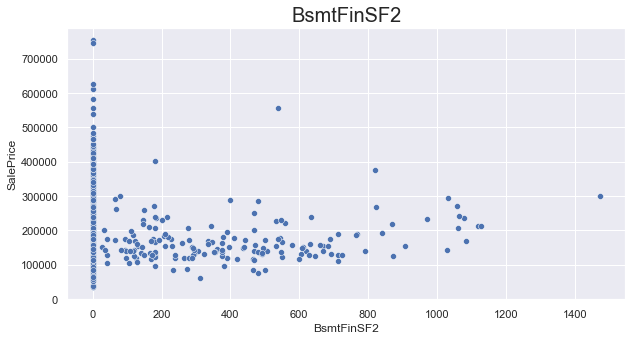

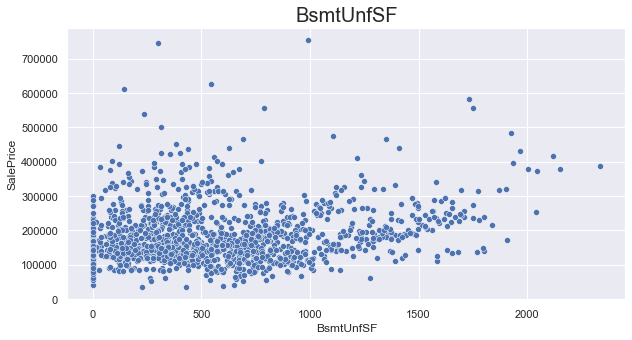

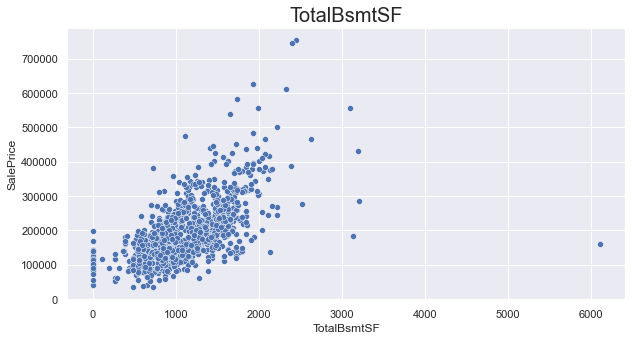

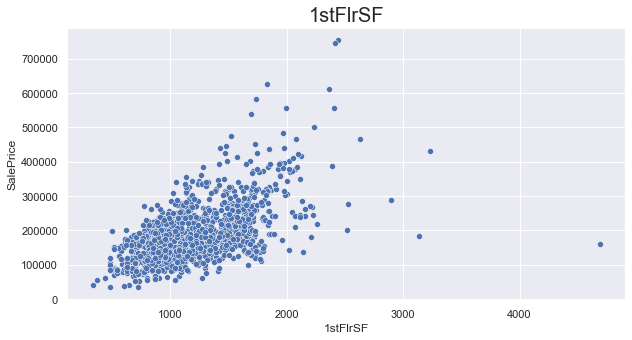

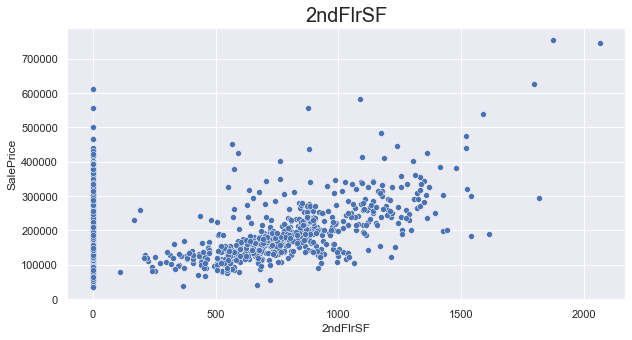

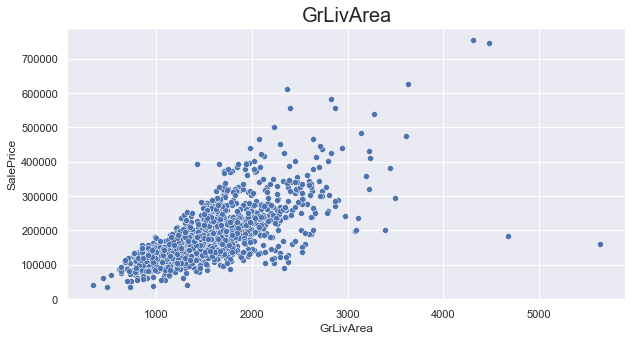

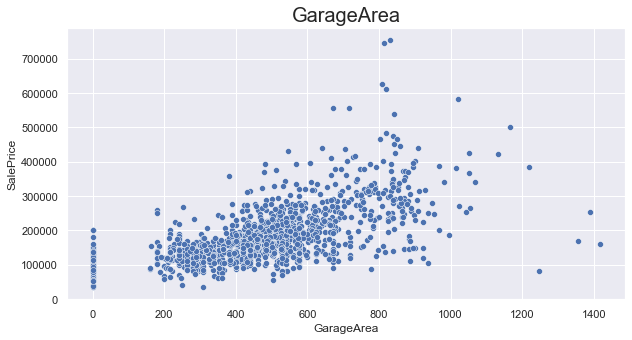

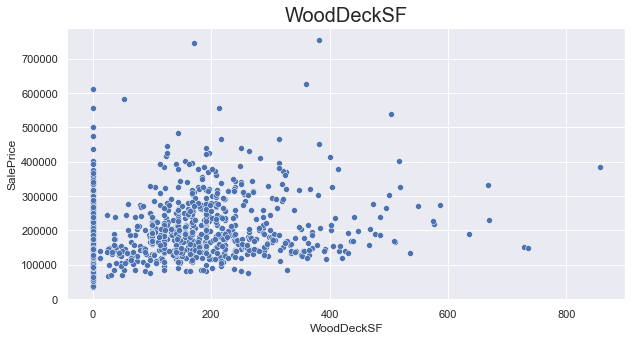

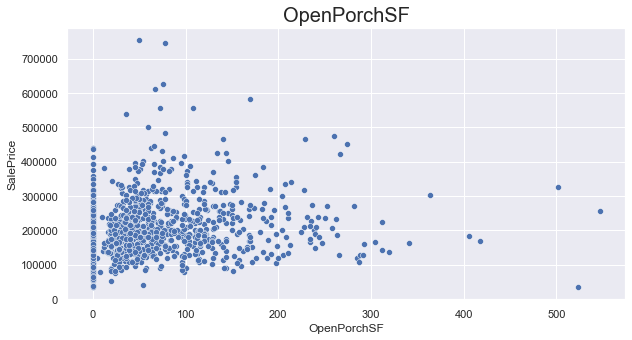

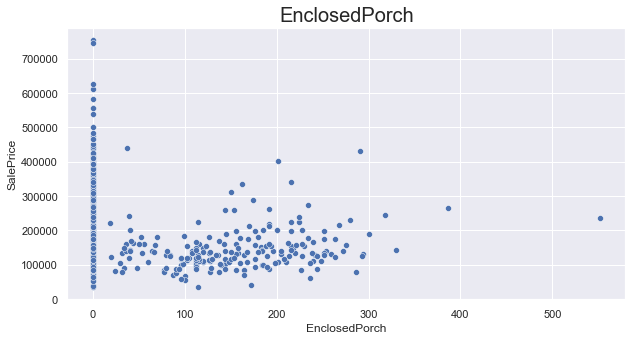

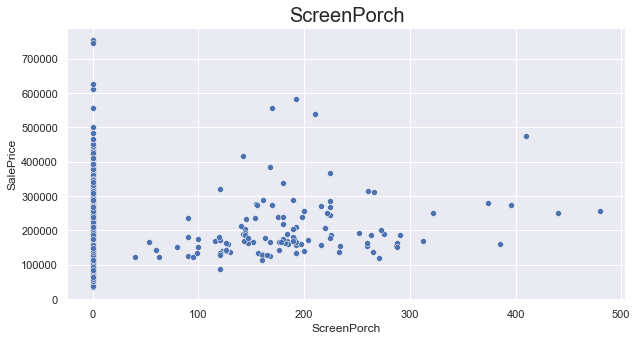

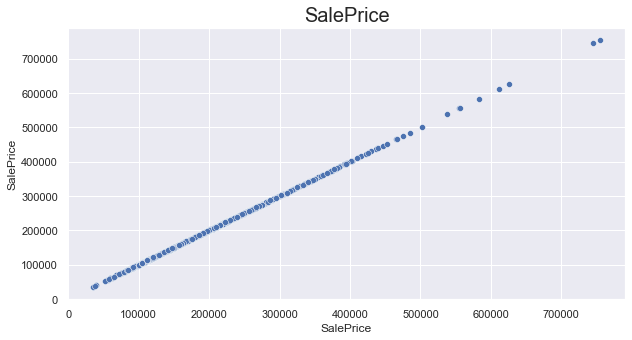

In [130]:
# Relationship between Continuous variable and SalePrice
sns.set({'figure.figsize':(10,5)})
for var in continuous_var:
    df = data.copy()
    
    sns.scatterplot(x=var, y ='SalePrice',data=df)
    plt.ylabel('SalePrice')
    plt.title(var, fontsize=20)
    plt.show()

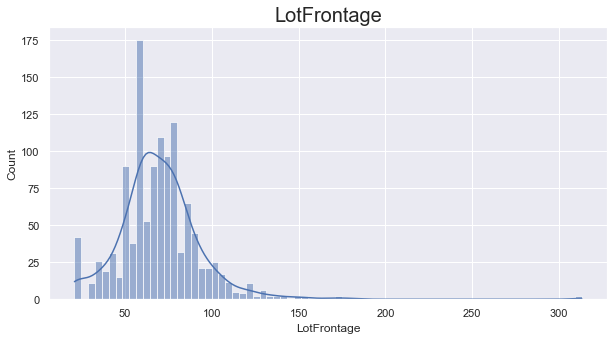

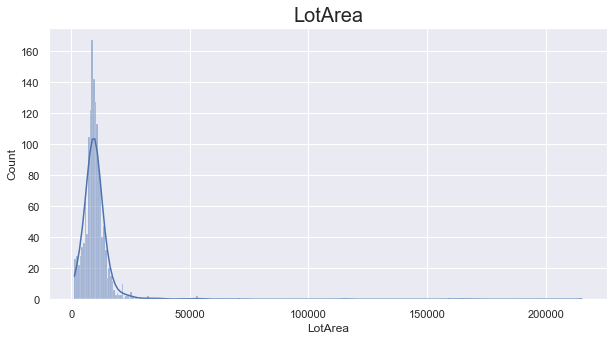

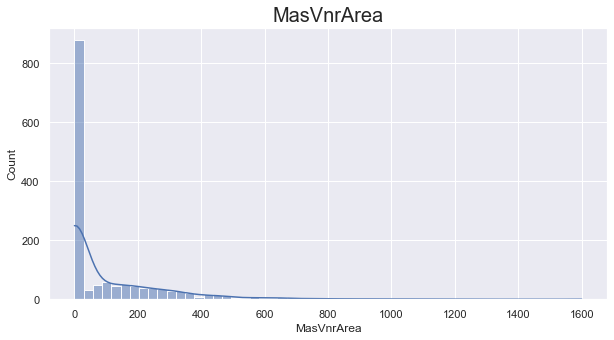

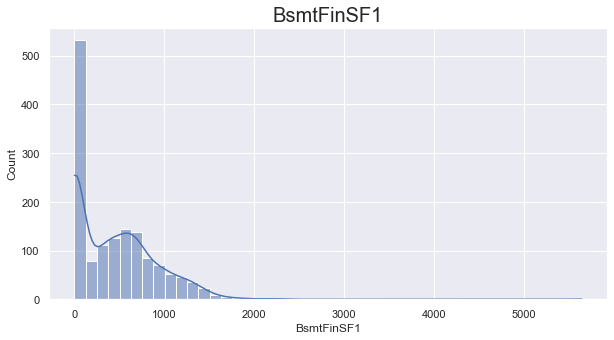

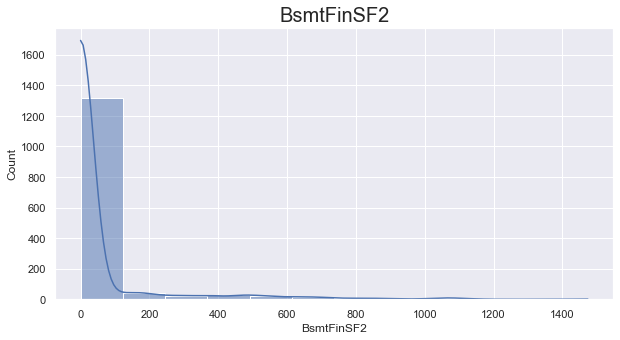

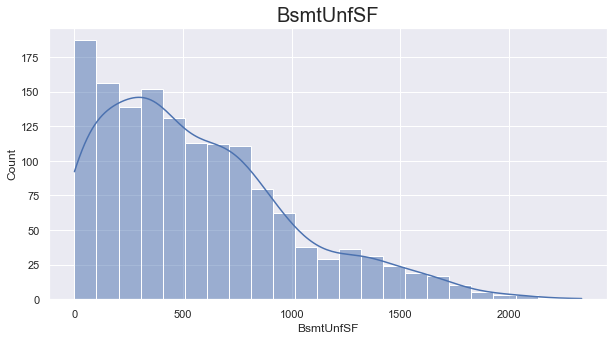

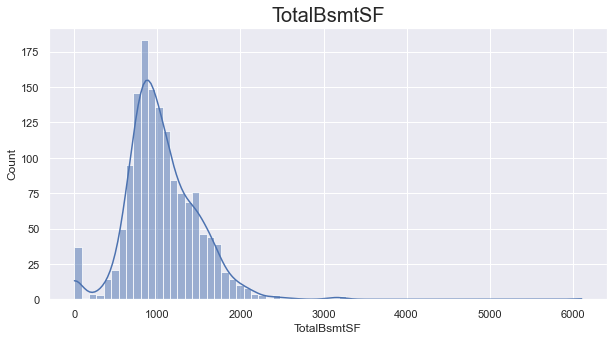

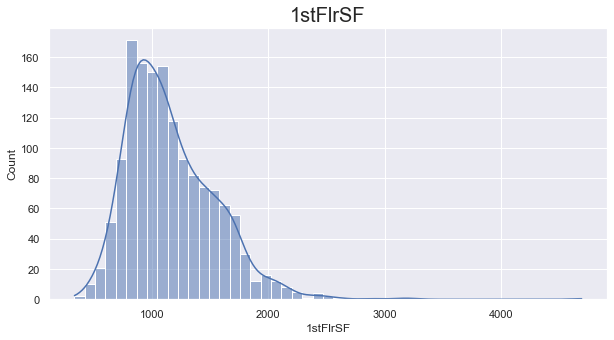

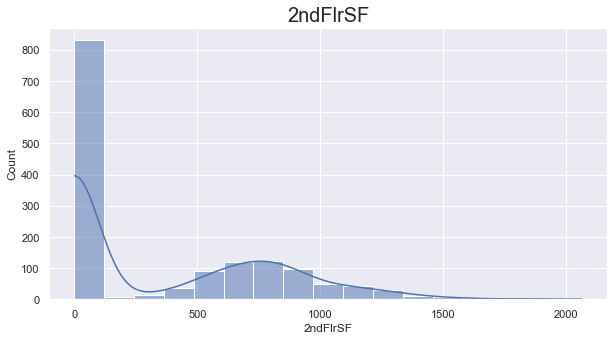

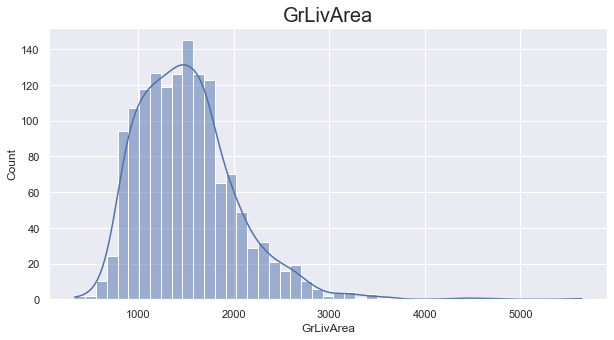

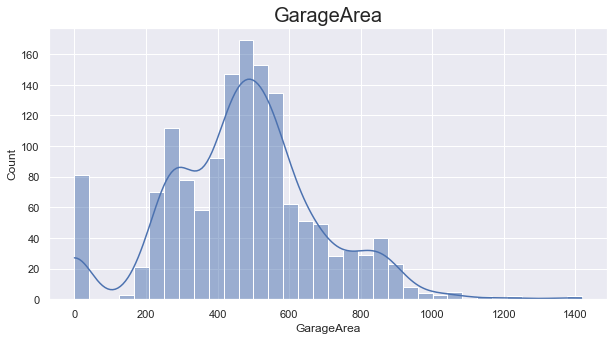

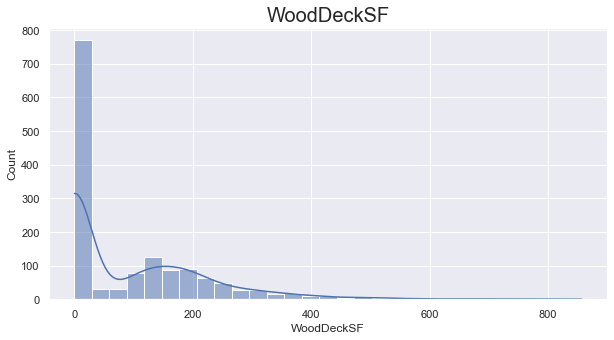

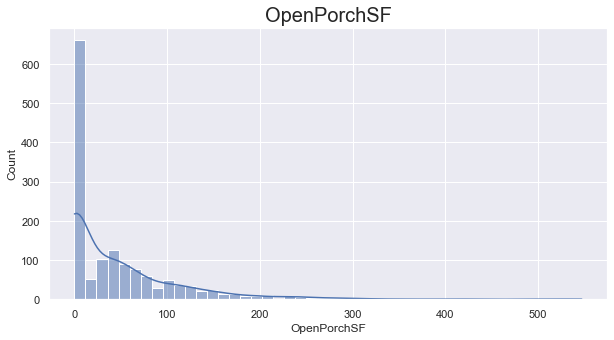

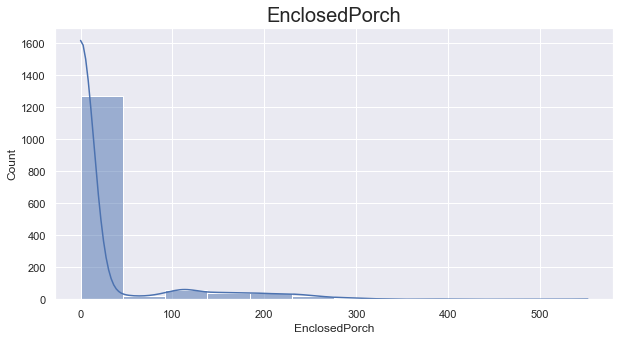

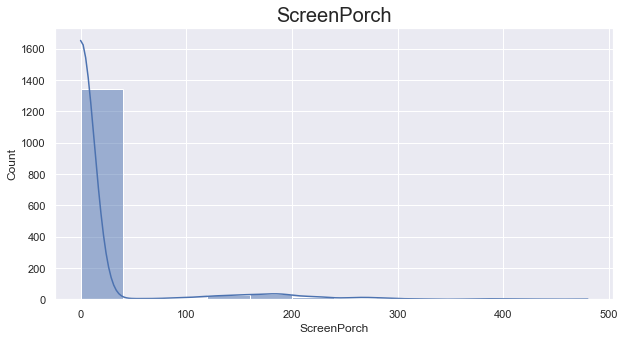

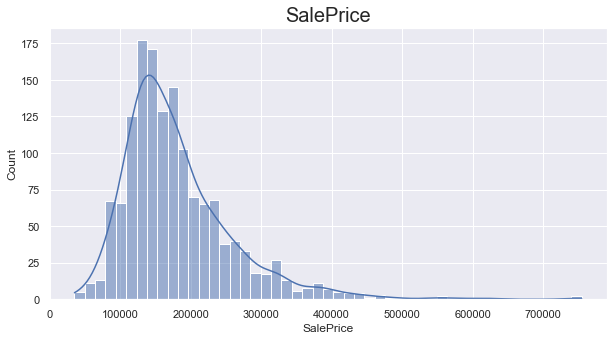

In [133]:
# Distribution of Continuous variables:
for var in continuous_var:
    df = data.copy()
    
    sns.histplot(data[var], kde=True)
    plt.title(var, fontsize=20)
    plt.show()

#### Conclusions:
1. Almost all the Distribution are not gaussian distribution.
2. <b>Task:</b> To make it Gaussian we will do Log-Normal Transform.

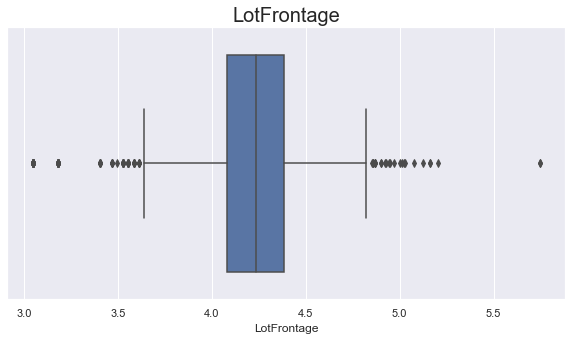

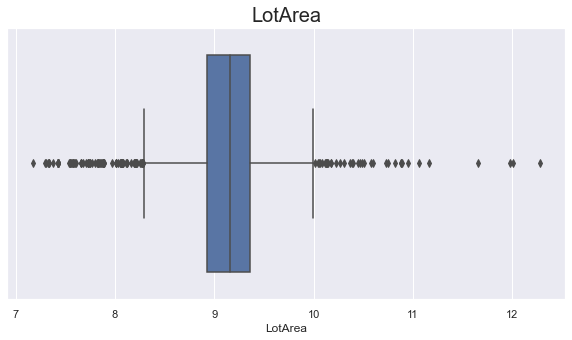

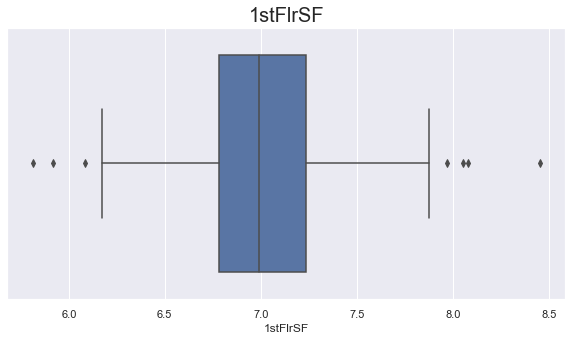

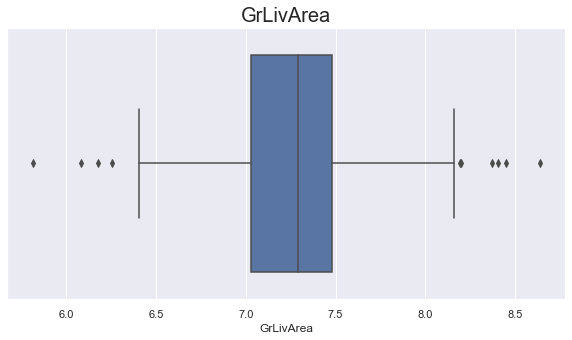

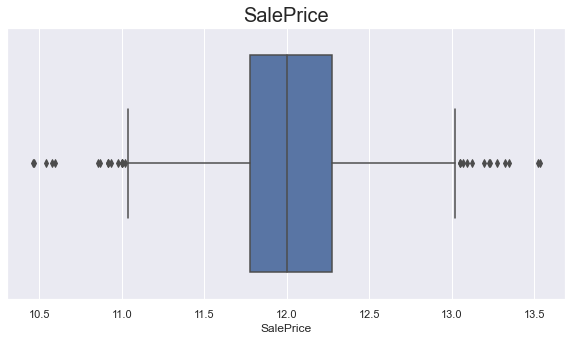

In [132]:
# Outliers - Only define for continuous variable
for var in continuous_var:
    df = data.copy()
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        sns.boxplot(x = var,data=df)
        plt.title(var, fontsize = 20)
        plt.show()
        

## 2. Categorical

In [135]:
# Already define categorical variable as categorical_var
data[categorical_var].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [137]:
# Number of unique values
for var in categorical_var:
    print(var ,'has unique values',len(df[var].unique()))

MSZoning has unique values 5
Street has unique values 2
Alley has unique values 3
LotShape has unique values 4
LandContour has unique values 4
Utilities has unique values 2
LotConfig has unique values 5
LandSlope has unique values 3
Neighborhood has unique values 25
Condition1 has unique values 9
Condition2 has unique values 8
BldgType has unique values 5
HouseStyle has unique values 8
RoofStyle has unique values 6
RoofMatl has unique values 8
Exterior1st has unique values 15
Exterior2nd has unique values 16
MasVnrType has unique values 5
ExterQual has unique values 4
ExterCond has unique values 5
Foundation has unique values 6
BsmtQual has unique values 5
BsmtCond has unique values 5
BsmtExposure has unique values 5
BsmtFinType1 has unique values 7
BsmtFinType2 has unique values 7
Heating has unique values 6
HeatingQC has unique values 5
CentralAir has unique values 2
Electrical has unique values 6
KitchenQual has unique values 4
Functional has unique values 7
FireplaceQu has unique v

#### Conclusions:
1. Some features have lot of categorical values i.e., more than 8.In such cases we will use Label Encoding.
2. In Remaining categories we can use One hot Encoding.

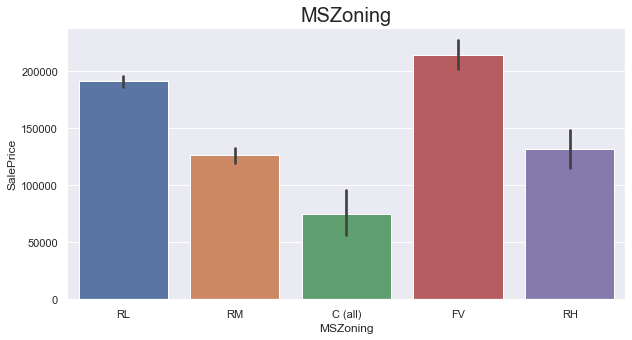

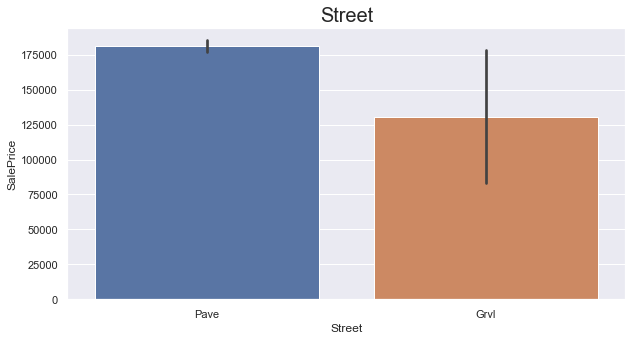

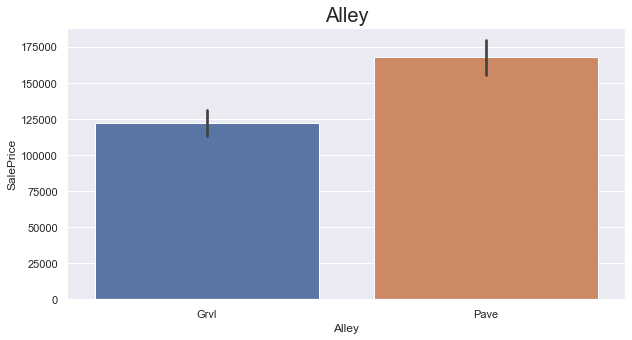

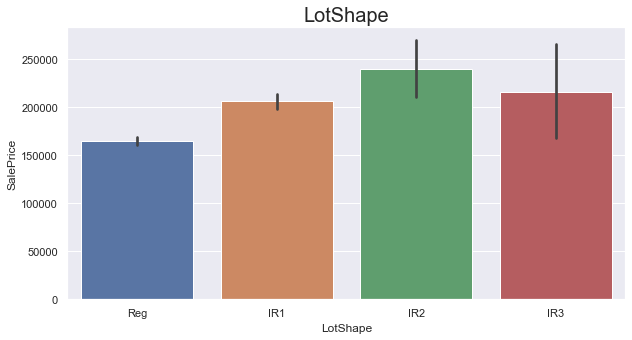

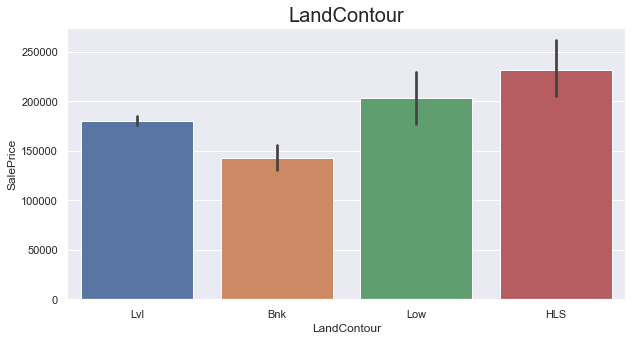

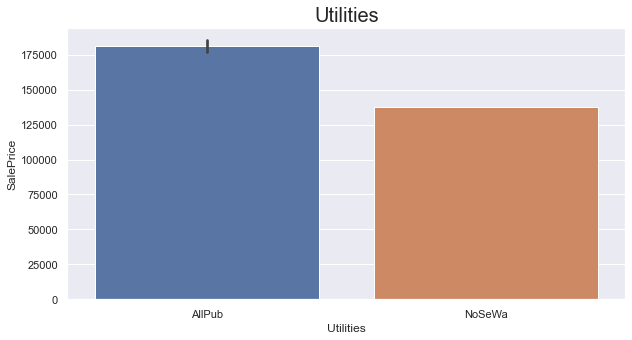

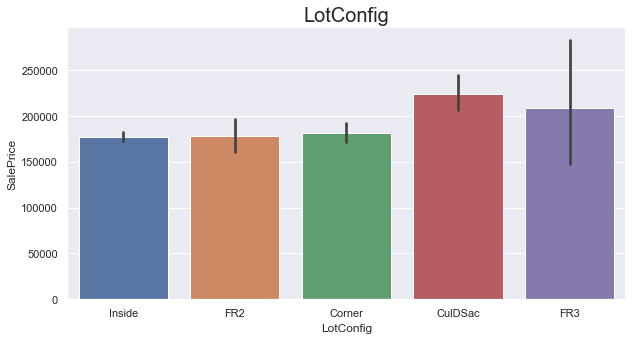

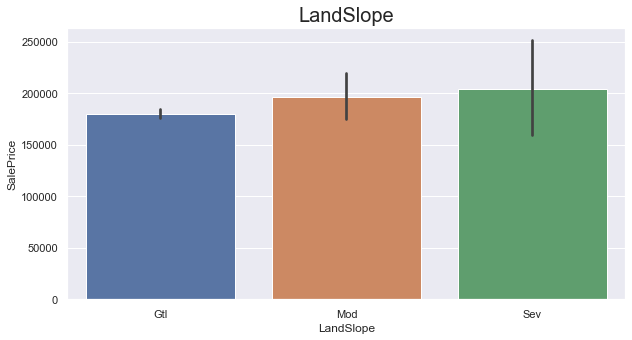

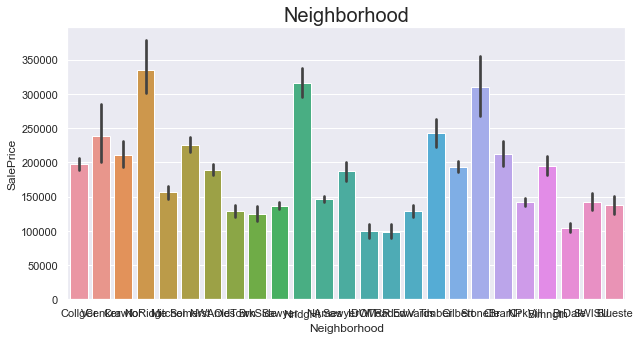

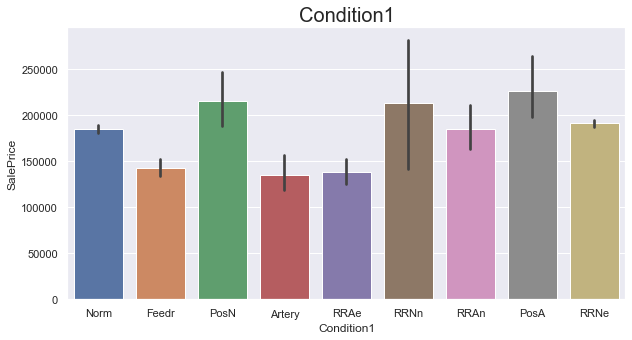

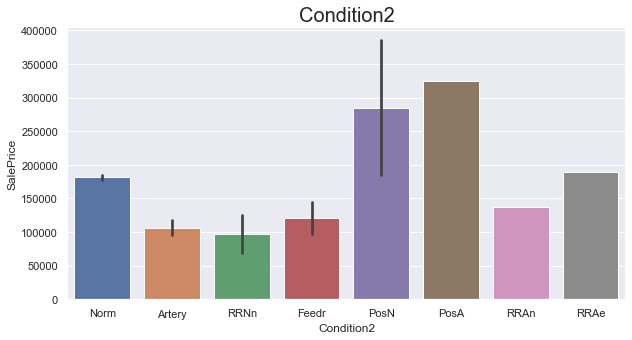

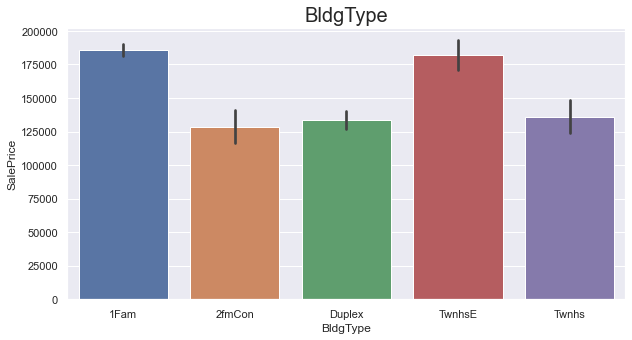

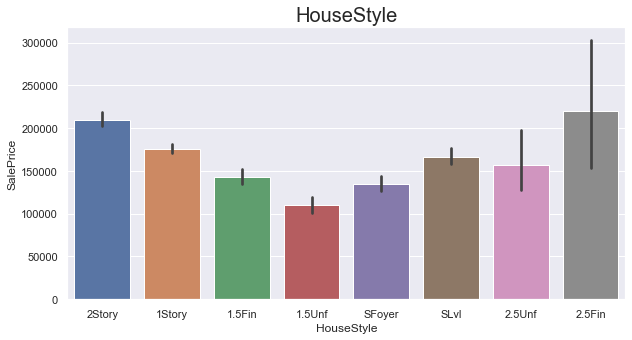

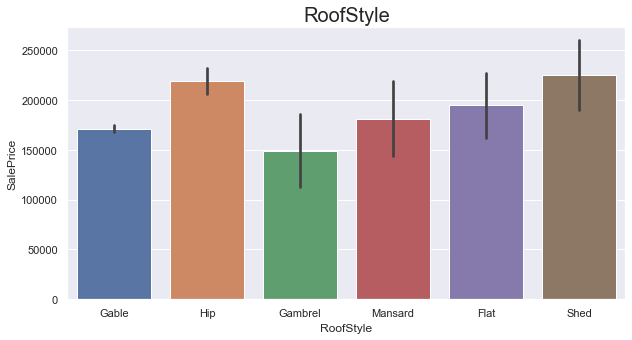

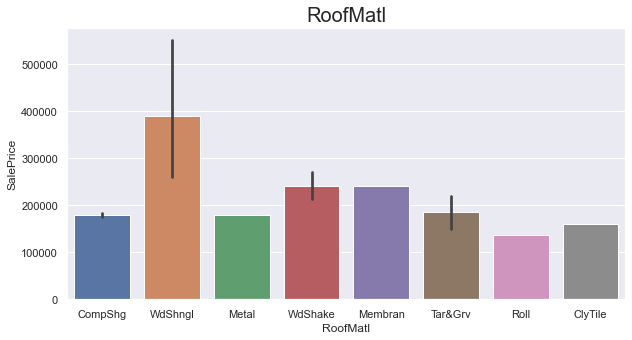

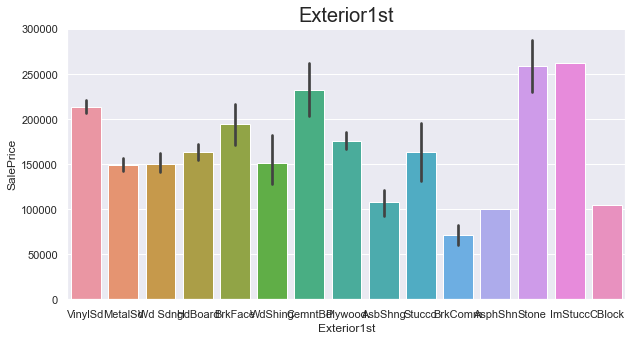

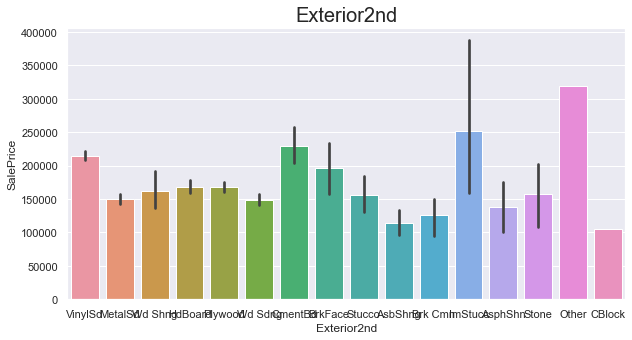

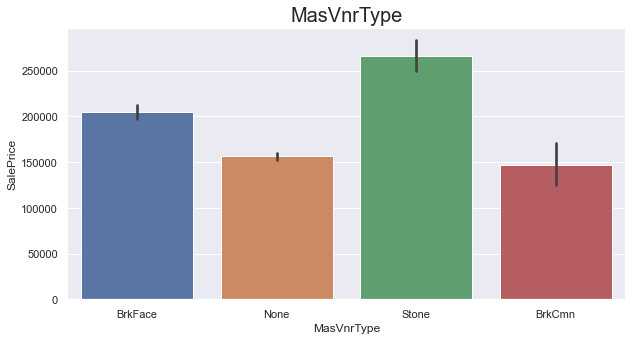

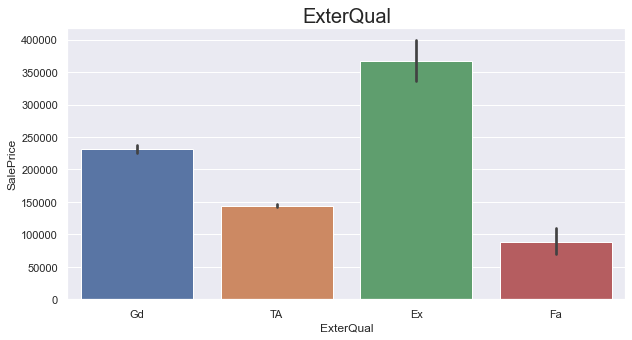

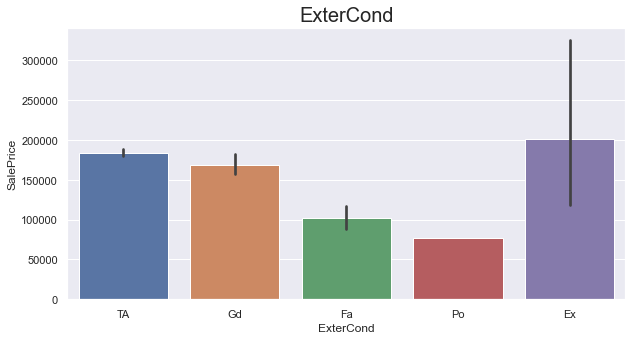

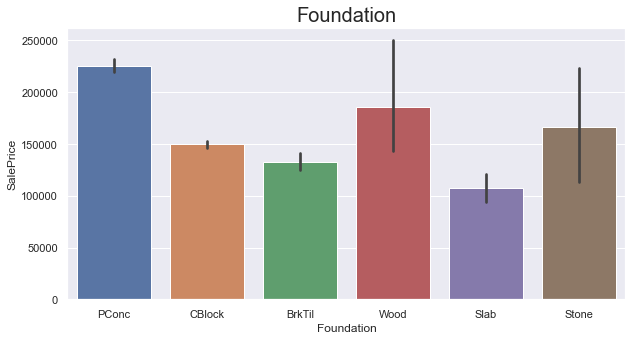

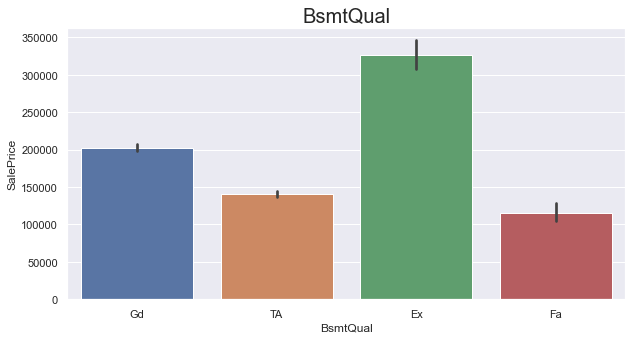

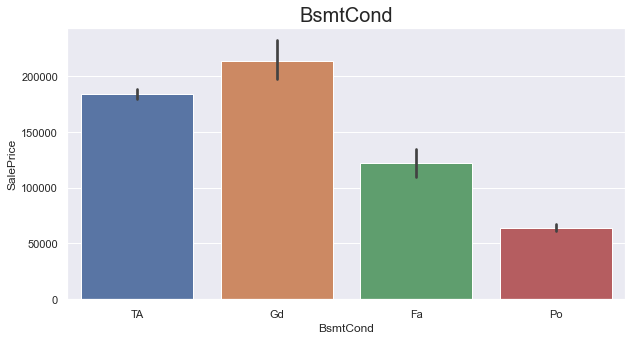

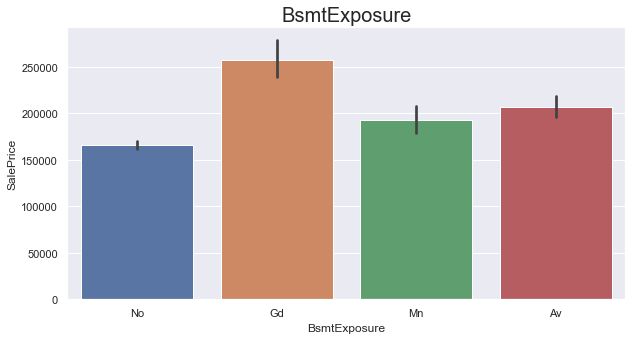

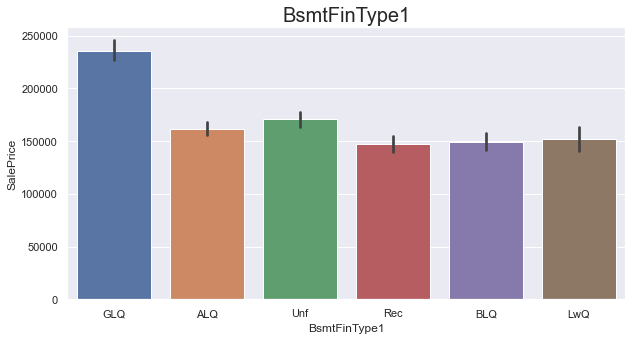

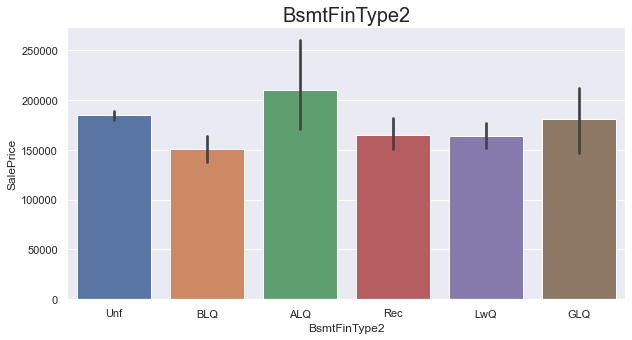

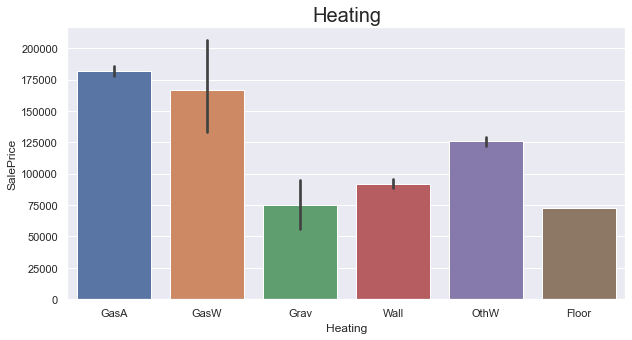

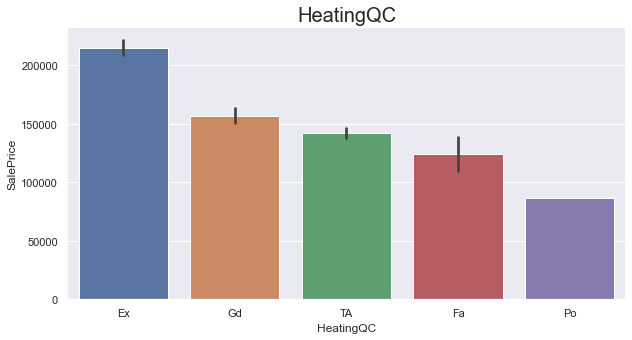

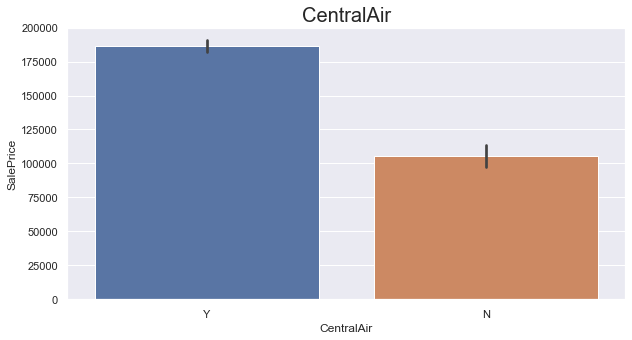

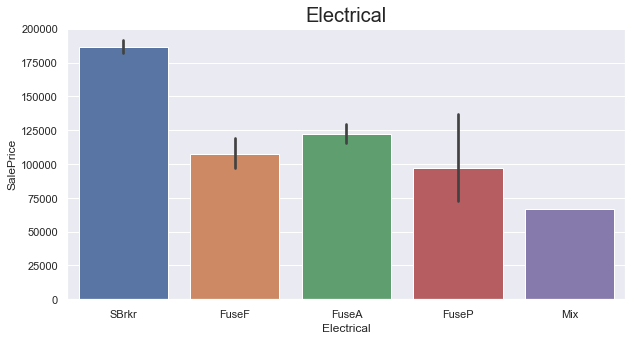

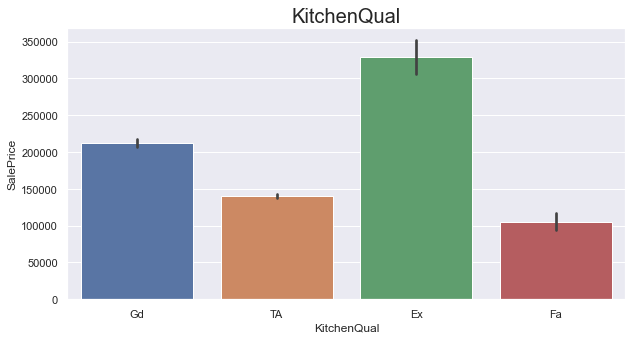

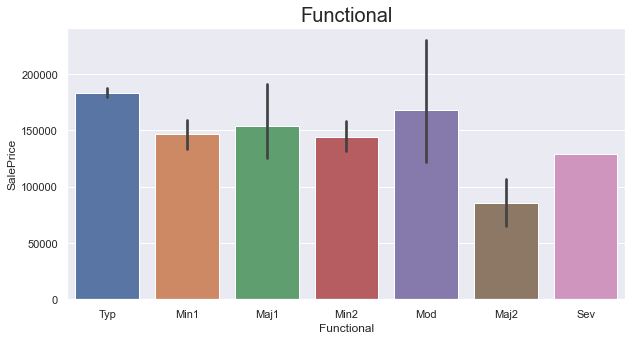

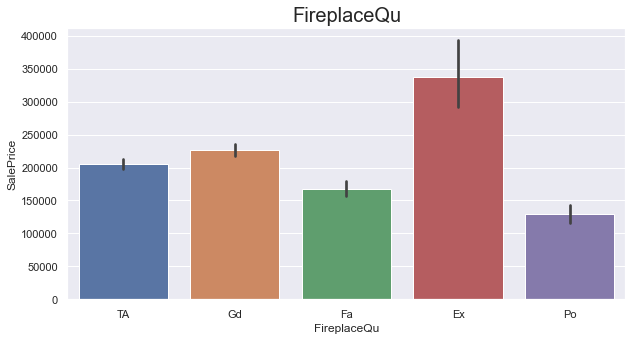

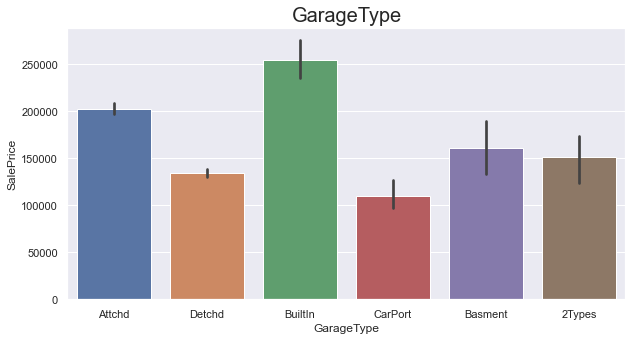

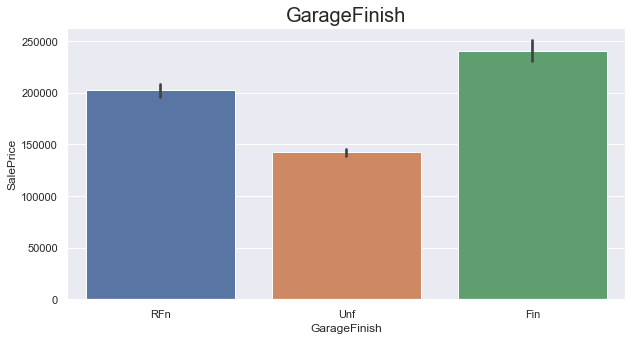

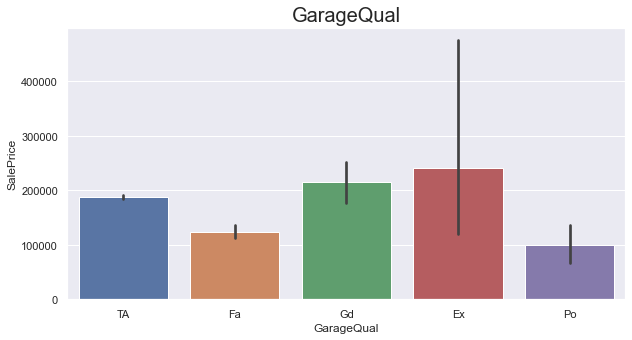

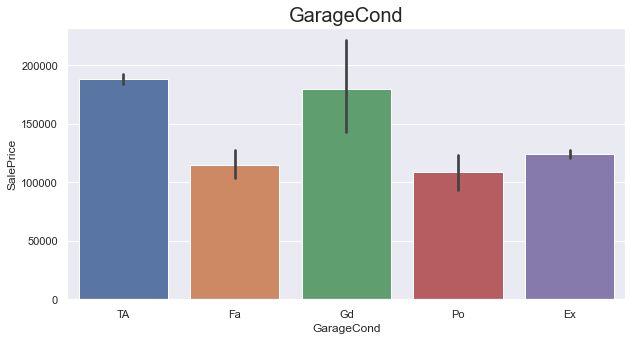

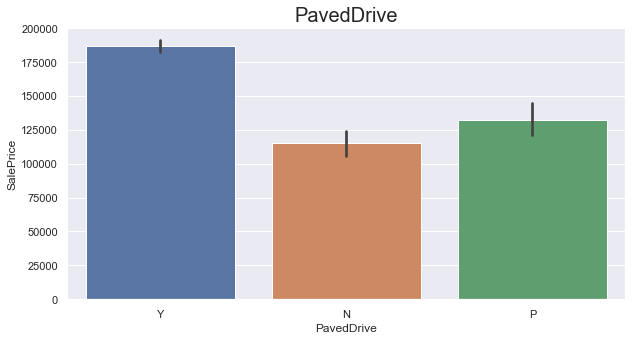

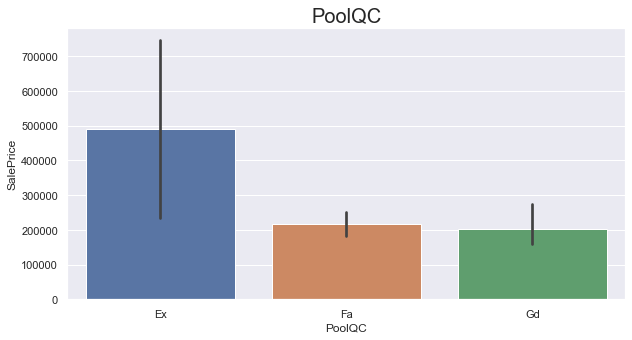

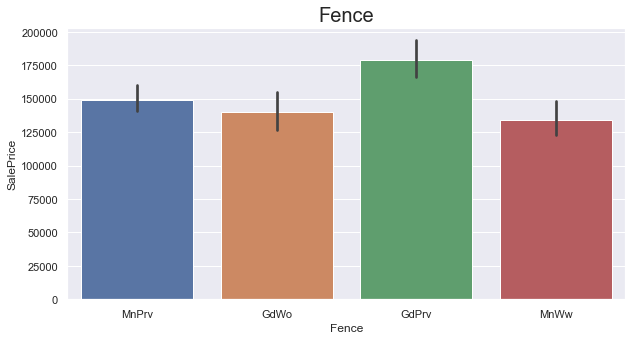

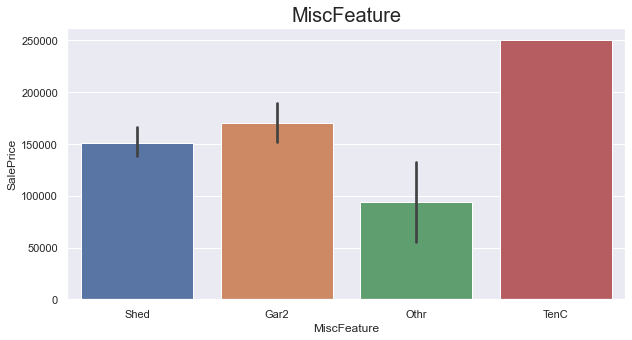

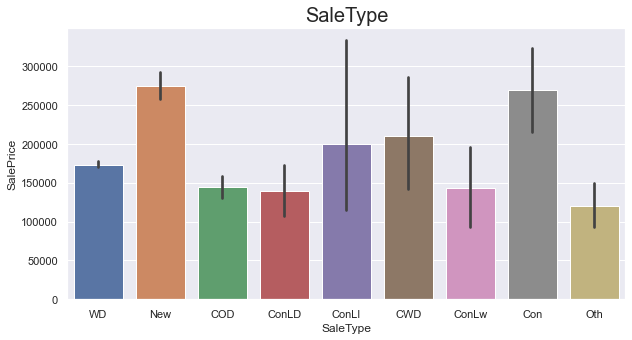

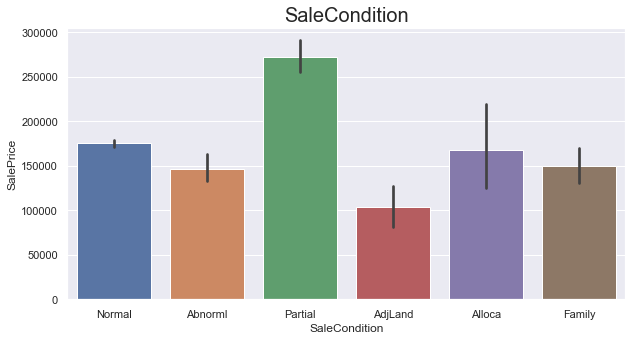

In [152]:
# Relationship between categorical features and SalePrice
for var in categorical_var:
    df = data.copy()
    
    sns.barplot(x = var,y='SalePrice',data=df)
    plt.title(var,fontsize = 20)
    plt.show()

# 2. Feature Engineering

## 2.1 Handling Missing values
### 2.1.1 Categorical

In [221]:
# Handling Categorical missing values
catvar_na = [var for var in data.columns if data[var].isnull().sum()>0 and data[var].dtypes == 'O' ]

# Print all missing values
for var in catvar_na:
     print('{} has missing values of {} %'.format(var,np.round(data[var].isnull().mean(),3)*100))

Alley has missing values of 93.8 %
MasVnrType has missing values of 0.5 %
BsmtQual has missing values of 2.5 %
BsmtCond has missing values of 2.5 %
BsmtExposure has missing values of 2.6 %
BsmtFinType1 has missing values of 2.5 %
BsmtFinType2 has missing values of 2.6 %
Electrical has missing values of 0.1 %
FireplaceQu has missing values of 47.3 %
GarageType has missing values of 5.5 %
GarageFinish has missing values of 5.5 %
GarageQual has missing values of 5.5 %
GarageCond has missing values of 5.5 %
PoolQC has missing values of 99.5 %
Fence has missing values of 80.80000000000001 %
MiscFeature has missing values of 96.3 %


#### Conclusions:
1. Alley, PoolQC, Fence, MiscFeature has more than 80% missing values. So dropping this variable are great.
2. For Remaining features we are going to use mode to replace it.

In [222]:
data1 = data.copy()

In [223]:
# Droping Alley, PoolQC, Fence, MiscFeature
data1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [224]:
# Remove Alley, PoolQC, Fence, MiscFeature from catvar_na
catvar_na.remove('Alley')
catvar_na.remove('PoolQC')
catvar_na.remove('Fence')
catvar_na.remove('MiscFeature')

In [225]:
# Remaining are replace by mode
for var in catvar_na:
    data1[var].fillna(data1[var].mode()[0], inplace= True)

In [226]:
data1[catvar_na].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### 2.1.2 Numerical

In [227]:
# Numerical Variable with missing values
numvar_na = data1[numerical_var].columns[data1[numerical_var].isnull().any()]

# Print the percentage of missing values
for var in numvar_na:
    print('{} has {} % of missing values'.format(var,np.round(df[var].isnull().mean(),3)*100))

LotFrontage has 17.7 % of missing values
MasVnrArea has 0.5 % of missing values
GarageYrBlt has 5.5 % of missing values


In [229]:
# Replace the missing values with median
for var in numvar_na:
    data1[var].fillna(df[var].median(),inplace = True)

<AxesSubplot:ylabel='Id'>

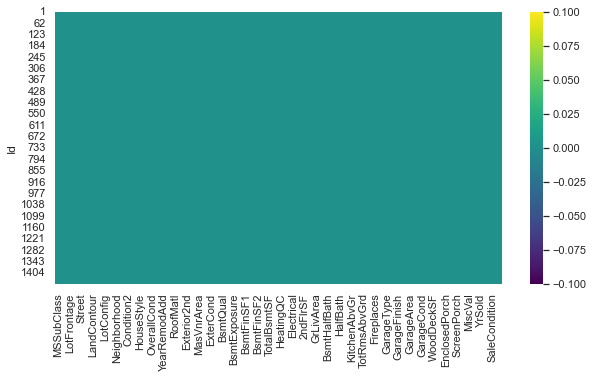

In [232]:
# Checking the missing values by heatmap
sns.heatmap(data1.isnull(),cmap='viridis')

In [38]:
data1 = data.drop(columns = ['Alley','PoolQC','Fence','MiscFeature','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','WoodDeckSF'])
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,548,TA,TA,Y,61,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,460,TA,TA,Y,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,608,TA,TA,Y,42,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,642,TA,TA,Y,35,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,836,TA,TA,Y,84,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,460,TA,TA,Y,40,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,500,TA,TA,Y,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,252,TA,TA,Y,60,5,2010,WD,Normal,266500


In [ ]:
data1.info()

### Conclusions 2
1. TotRmsAbvGrd, KitchenQual, Functional - Ordinal data
2. In PoolArea 0 means null value. It means 1453 house has no pools.
3. 


#### Basement
1. BsmtQual
2. BsmtCond
3. BsmtExposure
4. BsmtFinType1
5. BsmtFinSF1
6. BsmtFinType2
7. BsmtFinSF2
8. BsmtUnfSF
9. TotalBsmtSF

#### Power System
1. Heating  - Type of heating
2. HeatingQC - Heating Quality and Conditiond
3. CentralAir - Central Air Conditioning
4. Electrical - Electrical System

#### Kitchen
1. Kitchen - No of kitchen
2. KitchenQual - Kitchen Quality

#### FirePlaces
1. Fireplaces - Number of fireplaces
2. FireplaceQu

#### Garage:
 1.   GarageCond & GarageQual - Same type of data
 2.   GarageCars & GarageArea - Same type of data
 3.   GarageFinish
 4.   GarageType - Garage Location
 5.   GarageYrBlt 
 
#### Porch Area
 1. OpenPorchSF
 2. EnclosePorch
 3. 3 SsnPorch
 4. ScreenPorch
 
#### Pool
 1. PoolArea - Pool Area in sq feet
 2. PoolQC

#### Extra Feature
1. MiscFeature
2. MiscVal

#### Sale
1. MoSold
2. YrSold
3. SaleType
4. SaleCondition'
5. SalePrice

#### TOTAL Home
1. Functional
2. TotalRmsAbvGrd

In [ ]:
data1['OpenPorchSF'].value_counts() # 0 means null here.

In [ ]:
print(data1[data.OpenPorchSF == 0]['SalePrice'].mean())
print(data1[data.OpenPorchSF != 0]['SalePrice'].mean())
# Conc: Porch Area Affect the price.

In [ ]:
pd.DataFrame([data.OpenPorchSF , data.SalePrice]).T.corr()